# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:47:08.939152: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:47:12.405059
2025-04-14 18:47:12.405059


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:47:05"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

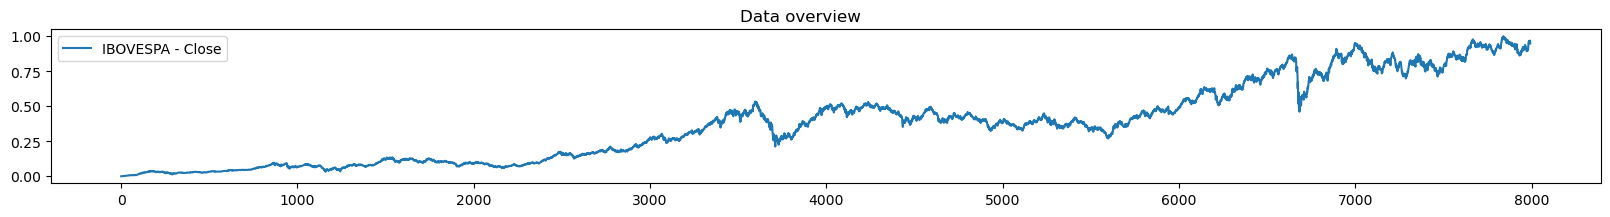

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

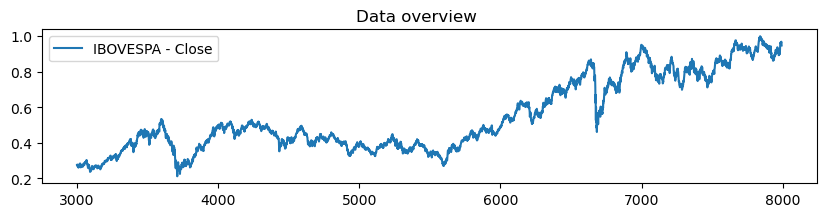

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

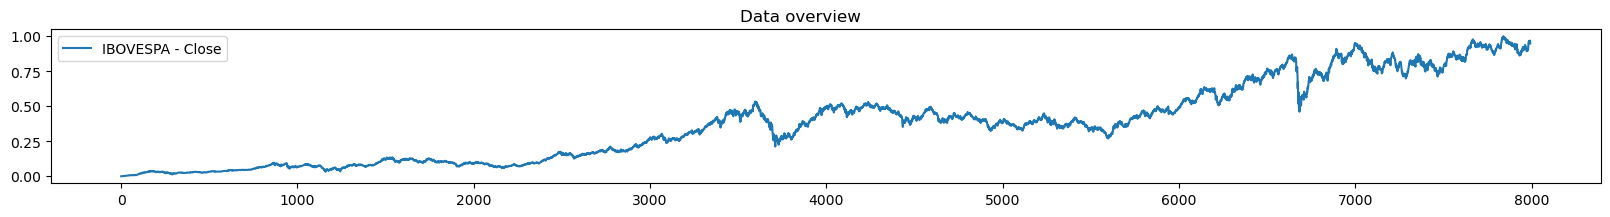

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

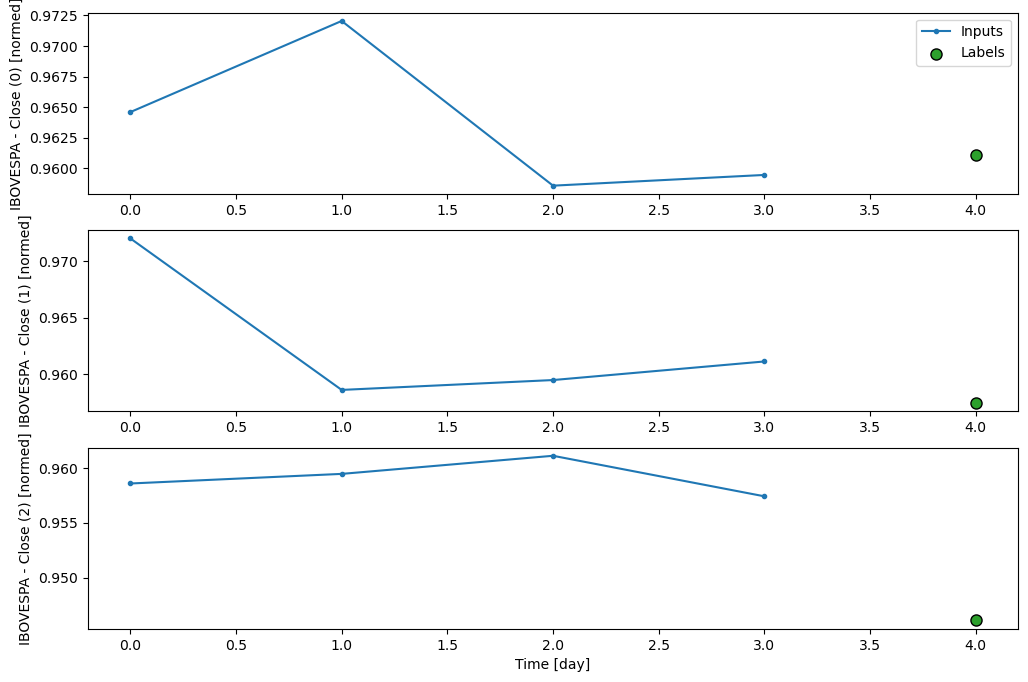

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

1

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13:07 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.3573 - mean_squared_error: 4.7518e-05 - root_mean_squared_error: 0.0062   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.9225 - mean_squared_error: 6.4042e-05 - root_mean_squared_error: 0.0076

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 41.8727 - mean_squared_error: 6.3721e-05 - root_mean_squared_error: 0.0077

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 37.4614 - mean_squared_error: 6.2113e-05 - root_mean_squared_error: 0.0077

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 34.6873 - mean_squared_error: 7.4474e-05 - root_mean_squared_error: 0.0083

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 32.7749 - mean_squared_error: 8.8157e-05 - root_mean_squared_error: 0.0090

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.4643 - mean_squared_error: 1.0773e-04 - root_mean_squared_error: 0.0099

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.6898 - mean_squared_error: 1.2278e-04 - root_mean_squared_error: 0.0105

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.8463 - mean_squared_error: 1.3802e-04 - root_mean_squared_error: 0.0111

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.9747 - mean_squared_error: 1.5219e-04 - root_mean_squared_error: 0.0117

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 28.2061 - mean_squared_error: 1.6284e-04 - root_mean_squared_error: 0.0121

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 27.5529 - mean_squared_error: 1.7494e-04 - root_mean_squared_error: 0.0125

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.9895 - mean_squared_error: 1.9069e-04 - root_mean_squared_error: 0.0131

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 26.4413 - mean_squared_error: 2.0457e-04 - root_mean_squared_error: 0.0136

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 25.9040 - mean_squared_error: 2.1682e-04 - root_mean_squared_error: 0.0140

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.3830 - mean_squared_error: 2.2878e-04 - root_mean_squared_error: 0.0144

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 24.8954 - mean_squared_error: 2.4688e-04 - root_mean_squared_error: 0.0149

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.4860 - mean_squared_error: 2.8964e-04 - root_mean_squared_error: 0.0158

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 24.1826 - mean_squared_error: 4.2577e-04 - root_mean_squared_error: 0.0178

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 23.9263 - mean_squared_error: 5.8844e-04 - root_mean_squared_error: 0.0199

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 23.6915 - mean_squared_error: 7.4839e-04 - root_mean_squared_error: 0.0220

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 23.4636 - mean_squared_error: 8.9499e-04 - root_mean_squared_error: 0.0239

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 23.2391 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0256    

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 23.0172 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0271

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 22.8017 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 22.5999 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0297

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 22.4090 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 22.2331 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.0599 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0332

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 21.8822 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0342

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 21.7162 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0352

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 21.5600 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0364

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 21.4058 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0374

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 21.2283 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0386


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 21.1846 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0389 - val_loss: 0.1262 - val_mean_absolute_error: 0.1262 - val_mean_absolute_percentage_error: 13.5065 - val_mean_squared_error: 0.0172 - val_root_mean_squared_error: 0.1313


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6373 - mean_absolute_error: 0.6373 - mean_absolute_percentage_error: 29898.6445 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6373

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6197 - mean_absolute_error: 0.6197 - mean_absolute_percentage_error: 13812.1738 - mean_squared_error: 0.3850 - root_mean_squared_error: 0.6202 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5715 - mean_absolute_error: 0.5715 - mean_absolute_percentage_error: 9836.1250 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5797 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5138 - mean_absolute_error: 0.5138 - mean_absolute_percentage_error: 8029.4233 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5390

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4807 - mean_absolute_error: 0.4807 - mean_absolute_percentage_error: 7190.6372 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5150

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 6384.2080 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4887

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 5543.9419 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4576

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 4918.6084 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4318

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 4372.2456 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.4072

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 4043.6287 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3913

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 3723.6248 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3751

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 3455.4150 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3608

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 3226.9507 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3481

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 3029.7256 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3367

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 2857.5298 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3263

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 2705.7178 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3170

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 2570.7666 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3084

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 2449.9421 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.3006

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 2341.1248 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2934

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 2229.2034 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2860

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 2140.5312 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2799

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 2059.3269 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2743

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 1984.6489 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2690

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 1915.7100 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2640

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 1851.8522 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2593

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1784.3796 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2542

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 1729.6328 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2501

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 1671.4314 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2455

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1623.9355 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2418

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 1579.3203 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2383

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1537.3176 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2349

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - mean_absolute_percentage_error: 1497.7090 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2317

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 1460.2863 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2287

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1424.8635 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2258

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1391.2772 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2231


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1377.4192 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2219 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439 - val_mean_absolute_percentage_error: 4.6658 - val_mean_squared_error: 0.0024 - val_root_mean_squared_error: 0.0490


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 20070.3848 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4279

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 9265.3184 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.4161  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3655 - mean_absolute_error: 0.3655 - mean_absolute_percentage_error: 6305.9619 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3781

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 5029.8428 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3452

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 4222.0723 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.3188

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 3659.1245 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2976

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 3294.9563 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2825

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 3048.2354 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2717

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 2764.9490 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2584

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 2534.7756 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2470

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 2343.5913 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2371

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 2181.9724 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2283

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 2043.3024 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2205

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 1922.8464 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2134

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1817.1241 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2070

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 1723.5072 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2012

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 1639.9636 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.1959

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 1564.9005 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1910

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 1497.0505 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1864

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 1435.3853 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1822

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1379.0696 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1782

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1327.4138 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1746

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1279.8456 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1711

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 1235.8840 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1679

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 1195.1189 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1648

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1152.0027 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1615

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 1116.9850 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1588

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1084.2297 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1562

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 1053.5189 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1538

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1024.6613 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1514

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 997.4871 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1492 

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 968.3047 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1468

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 944.2625 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1448

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 921.4941 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1429


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 899.9043 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1411 - val_loss: 0.0659 - val_mean_absolute_error: 0.0659 - val_mean_absolute_percentage_error: 7.0423 - val_mean_squared_error: 0.0048 - val_root_mean_squared_error: 0.0689


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 5107.7803 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1090

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 2086.6406 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0857  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 1483.8334 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0757

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 1177.3887 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0686

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 986.1793 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0632 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 853.7274 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0590

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 756.0659 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 680.7631 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0528

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 620.6444 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 584.4924 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 541.1921 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 504.6140 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 473.1959 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 445.8568 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 418.6237 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 400.5098 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 381.4612 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 364.3261 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 348.8251 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 334.7227 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 321.8295 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 311.6233 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 300.5858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 290.3800 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 279.6155 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 270.8949 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 262.7552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 256.1960 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 247.9919 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 241.2743 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 234.9471 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 228.9793 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 223.3406 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 218.0026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 212.2397 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.8573 - val_mean_squared_error: 4.1574e-04 - val_root_mean_squared_error: 0.0204


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 1664.6008 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 684.9662 - mean_squared_error: 6.9605e-04 - root_mean_squared_error: 0.0260

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 457.9049 - mean_squared_error: 5.7354e-04 - root_mean_squared_error: 0.0236

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 367.0409 - mean_squared_error: 5.1551e-04 - root_mean_squared_error: 0.0224

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 309.7372 - mean_squared_error: 4.6682e-04 - root_mean_squared_error: 0.0212

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 270.0187 - mean_squared_error: 4.3153e-04 - root_mean_squared_error: 0.0204

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 240.7083 - mean_squared_error: 4.0378e-04 - root_mean_squared_error: 0.0197

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 217.9345 - mean_squared_error: 3.8071e-04 - root_mean_squared_error: 0.0191

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 199.5741 - mean_squared_error: 3.6016e-04 - root_mean_squared_error: 0.0185

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 184.4403 - mean_squared_error: 3.4202e-04 - root_mean_squared_error: 0.0180

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 171.7076 - mean_squared_error: 3.2568e-04 - root_mean_squared_error: 0.0176

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 159.3848 - mean_squared_error: 3.0891e-04 - root_mean_squared_error: 0.0171

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 151.3844 - mean_squared_error: 2.9773e-04 - root_mean_squared_error: 0.0167

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 145.3820 - mean_squared_error: 2.8919e-04 - root_mean_squared_error: 0.0165

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 137.8365 - mean_squared_error: 2.7861e-04 - root_mean_squared_error: 0.0161

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 131.1376 - mean_squared_error: 2.7003e-04 - root_mean_squared_error: 0.0159

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 125.1436 - mean_squared_error: 2.6345e-04 - root_mean_squared_error: 0.0157

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 119.0253 - mean_squared_error: 2.5974e-04 - root_mean_squared_error: 0.0156

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 114.2236 - mean_squared_error: 2.6081e-04 - root_mean_squared_error: 0.0157

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 109.8522 - mean_squared_error: 2.6418e-04 - root_mean_squared_error: 0.0158

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 105.8488 - mean_squared_error: 2.6781e-04 - root_mean_squared_error: 0.0159

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 102.1638 - mean_squared_error: 2.7082e-04 - root_mean_squared_error: 0.0160

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 98.7572 - mean_squared_error: 2.7305e-04 - root_mean_squared_error: 0.0161 

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 95.5967 - mean_squared_error: 2.7454e-04 - root_mean_squared_error: 0.0162

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 92.6566 - mean_squared_error: 2.7552e-04 - root_mean_squared_error: 0.0162

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 89.9137 - mean_squared_error: 2.7606e-04 - root_mean_squared_error: 0.0162

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 87.3478 - mean_squared_error: 2.7621e-04 - root_mean_squared_error: 0.0163

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 84.9415 - mean_squared_error: 2.7606e-04 - root_mean_squared_error: 0.0163

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 82.6794 - mean_squared_error: 2.7566e-04 - root_mean_squared_error: 0.0163

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.5486 - mean_squared_error: 2.7507e-04 - root_mean_squared_error: 0.0163

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 78.5378 - mean_squared_error: 2.7453e-04 - root_mean_squared_error: 0.0163

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 76.6377 - mean_squared_error: 2.7429e-04 - root_mean_squared_error: 0.0163

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.8386 - mean_squared_error: 2.7412e-04 - root_mean_squared_error: 0.0163

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.1322 - mean_squared_error: 2.7395e-04 - root_mean_squared_error: 0.0163


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.5118 - mean_squared_error: 2.7376e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1455 - val_mean_squared_error: 1.7774e-04 - val_root_mean_squared_error: 0.0133


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 2496.6670 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 1066.2095 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 728.5544 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 567.9887 - mean_squared_error: 9.9787e-04 - root_mean_squared_error: 0.0302

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 471.1935 - mean_squared_error: 8.4754e-04 - root_mean_squared_error: 0.0276

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 405.2894 - mean_squared_error: 7.4079e-04 - root_mean_squared_error: 0.0256

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 357.2663 - mean_squared_error: 6.6099e-04 - root_mean_squared_error: 0.0240

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 320.4710 - mean_squared_error: 5.9865e-04 - root_mean_squared_error: 0.0227

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 287.5700 - mean_squared_error: 5.4217e-04 - root_mean_squared_error: 0.0215

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 264.4112 - mean_squared_error: 5.0201e-04 - root_mean_squared_error: 0.0205

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 242.6083 - mean_squared_error: 4.6402e-04 - root_mean_squared_error: 0.0197

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 226.5928 - mean_squared_error: 4.3596e-04 - root_mean_squared_error: 0.0190

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 212.7714 - mean_squared_error: 4.1162e-04 - root_mean_squared_error: 0.0184

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 200.7056 - mean_squared_error: 3.9025e-04 - root_mean_squared_error: 0.0179

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 190.0688 - mean_squared_error: 3.7134e-04 - root_mean_squared_error: 0.0174

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 180.6118 - mean_squared_error: 3.5450e-04 - root_mean_squared_error: 0.0169

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 173.2993 - mean_squared_error: 3.4161e-04 - root_mean_squared_error: 0.0166

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 167.6915 - mean_squared_error: 3.3191e-04 - root_mean_squared_error: 0.0163

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 160.4856 - mean_squared_error: 3.1951e-04 - root_mean_squared_error: 0.0160

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 153.9337 - mean_squared_error: 3.0825e-04 - root_mean_squared_error: 0.0157

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 147.9476 - mean_squared_error: 2.9795e-04 - root_mean_squared_error: 0.0154

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 142.4556 - mean_squared_error: 2.8851e-04 - root_mean_squared_error: 0.0152

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 137.3969 - mean_squared_error: 2.7984e-04 - root_mean_squared_error: 0.0149

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 132.7211 - mean_squared_error: 2.7183e-04 - root_mean_squared_error: 0.0147

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 128.3844 - mean_squared_error: 2.6439e-04 - root_mean_squared_error: 0.0145

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 124.3505 - mean_squared_error: 2.5747e-04 - root_mean_squared_error: 0.0143

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 120.5883 - mean_squared_error: 2.5107e-04 - root_mean_squared_error: 0.0141

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 116.5859 - mean_squared_error: 2.4431e-04 - root_mean_squared_error: 0.0139

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 113.3172 - mean_squared_error: 2.3883e-04 - root_mean_squared_error: 0.0138

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 110.2450 - mean_squared_error: 2.3375e-04 - root_mean_squared_error: 0.0136

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 107.3519 - mean_squared_error: 2.2928e-04 - root_mean_squared_error: 0.0135

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 104.6234 - mean_squared_error: 2.2569e-04 - root_mean_squared_error: 0.0134

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 102.0446 - mean_squared_error: 2.2257e-04 - root_mean_squared_error: 0.0133

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.6033 - mean_squared_error: 2.1989e-04 - root_mean_squared_error: 0.0133 


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 97.2887 - mean_squared_error: 2.1747e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.4022 - val_mean_squared_error: 2.5553e-04 - val_root_mean_squared_error: 0.0160


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 3803.9243 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0811

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 1960.4569 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 1332.1173 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 1010.0833 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 826.9779 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0511 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 706.1343 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 619.6506 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 554.3249 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 509.5392 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 466.5704 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 431.0230 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 401.1004 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 378.9260 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 356.2957 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 336.4995 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 319.0144 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 303.4398 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 289.4684 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 276.8622 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 268.5825 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 259.3470 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 249.4262 - mean_squared_error: 9.9714e-04 - root_mean_squared_error: 0.0289

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 240.3146 - mean_squared_error: 9.6592e-04 - root_mean_squared_error: 0.0284

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 231.9124 - mean_squared_error: 9.3699e-04 - root_mean_squared_error: 0.0280

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 224.1363 - mean_squared_error: 9.1000e-04 - root_mean_squared_error: 0.0275

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 216.9174 - mean_squared_error: 8.8482e-04 - root_mean_squared_error: 0.0271

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 210.1963 - mean_squared_error: 8.6130e-04 - root_mean_squared_error: 0.0267

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 203.9212 - mean_squared_error: 8.3923e-04 - root_mean_squared_error: 0.0263

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 197.2390 - mean_squared_error: 8.1565e-04 - root_mean_squared_error: 0.0259

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 191.7769 - mean_squared_error: 7.9631e-04 - root_mean_squared_error: 0.0256

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 186.6398 - mean_squared_error: 7.7823e-04 - root_mean_squared_error: 0.0253

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 181.7996 - mean_squared_error: 7.6172e-04 - root_mean_squared_error: 0.0250

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 176.6009 - mean_squared_error: 7.4556e-04 - root_mean_squared_error: 0.0247

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 172.3172 - mean_squared_error: 7.3368e-04 - root_mean_squared_error: 0.0246

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 168.2586 - mean_squared_error: 7.2290e-04 - root_mean_squared_error: 0.0244


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 164.9463 - mean_squared_error: 7.1430e-04 - root_mean_squared_error: 0.0243 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.3793 - val_mean_squared_error: 2.3935e-04 - val_root_mean_squared_error: 0.0155


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 3004.1240 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0640

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 1307.6437 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 899.4962 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 725.2193 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 598.4271 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 513.0549 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 443.6609 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 398.1388 - mean_squared_error: 9.5247e-04 - root_mean_squared_error: 0.0287

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 362.0083 - mean_squared_error: 8.7305e-04 - root_mean_squared_error: 0.0273

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 328.7884 - mean_squared_error: 7.9950e-04 - root_mean_squared_error: 0.0260

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 304.9034 - mean_squared_error: 7.4639e-04 - root_mean_squared_error: 0.0250

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 284.6288 - mean_squared_error: 7.0102e-04 - root_mean_squared_error: 0.0241

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 267.1594 - mean_squared_error: 6.6176e-04 - root_mean_squared_error: 0.0234

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 251.9301 - mean_squared_error: 6.2747e-04 - root_mean_squared_error: 0.0227

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 238.5280 - mean_squared_error: 5.9777e-04 - root_mean_squared_error: 0.0221

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 226.6336 - mean_squared_error: 5.7224e-04 - root_mean_squared_error: 0.0216

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 215.9941 - mean_squared_error: 5.5025e-04 - root_mean_squared_error: 0.0212

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 206.4178 - mean_squared_error: 5.3143e-04 - root_mean_squared_error: 0.0208

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 197.7560 - mean_squared_error: 5.1691e-04 - root_mean_squared_error: 0.0206

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 189.8745 - mean_squared_error: 5.0527e-04 - root_mean_squared_error: 0.0204

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 182.6640 - mean_squared_error: 4.9476e-04 - root_mean_squared_error: 0.0202

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 176.0379 - mean_squared_error: 4.8490e-04 - root_mean_squared_error: 0.0201

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 171.6218 - mean_squared_error: 4.7809e-04 - root_mean_squared_error: 0.0200

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 166.6361 - mean_squared_error: 4.7018e-04 - root_mean_squared_error: 0.0198

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 161.2100 - mean_squared_error: 4.6127e-04 - root_mean_squared_error: 0.0197

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 156.1615 - mean_squared_error: 4.5273e-04 - root_mean_squared_error: 0.0195

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 151.4512 - mean_squared_error: 4.4453e-04 - root_mean_squared_error: 0.0194

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 147.0449 - mean_squared_error: 4.3666e-04 - root_mean_squared_error: 0.0192

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 142.9128 - mean_squared_error: 4.2910e-04 - root_mean_squared_error: 0.0191

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 139.0294 - mean_squared_error: 4.2189e-04 - root_mean_squared_error: 0.0189

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 135.3723 - mean_squared_error: 4.1503e-04 - root_mean_squared_error: 0.0188

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 131.9223 - mean_squared_error: 4.0873e-04 - root_mean_squared_error: 0.0186

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 128.6612 - mean_squared_error: 4.0278e-04 - root_mean_squared_error: 0.0185

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 125.5736 - mean_squared_error: 3.9714e-04 - root_mean_squared_error: 0.0184

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 122.2395 - mean_squared_error: 3.9103e-04 - root_mean_squared_error: 0.0183


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 121.8371 - mean_squared_error: 3.9029e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7235 - val_mean_squared_error: 6.9319e-05 - val_root_mean_squared_error: 0.0083


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 2406.9744 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 1041.0275 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 723.5598 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 572.2438 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 479.9459 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 416.1202 - mean_squared_error: 9.2756e-04 - root_mean_squared_error: 0.0296

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 369.1586 - mean_squared_error: 8.5031e-04 - root_mean_squared_error: 0.0283

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 332.8786 - mean_squared_error: 7.8697e-04 - root_mean_squared_error: 0.0271

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 303.8246 - mean_squared_error: 7.3342e-04 - root_mean_squared_error: 0.0261

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 279.9528 - mean_squared_error: 6.8734e-04 - root_mean_squared_error: 0.0252

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 257.3571 - mean_squared_error: 6.4199e-04 - root_mean_squared_error: 0.0242

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 242.9263 - mean_squared_error: 6.1215e-04 - root_mean_squared_error: 0.0236

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 228.2258 - mean_squared_error: 5.8114e-04 - root_mean_squared_error: 0.0229

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 215.3919 - mean_squared_error: 5.5360e-04 - root_mean_squared_error: 0.0223

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 202.5734 - mean_squared_error: 5.2593e-04 - root_mean_squared_error: 0.0217

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 192.6815 - mean_squared_error: 5.0454e-04 - root_mean_squared_error: 0.0212

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 183.8134 - mean_squared_error: 4.8547e-04 - root_mean_squared_error: 0.0207

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 175.8164 - mean_squared_error: 4.6859e-04 - root_mean_squared_error: 0.0203

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 168.5677 - mean_squared_error: 4.5405e-04 - root_mean_squared_error: 0.0200

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 161.9604 - mean_squared_error: 4.4130e-04 - root_mean_squared_error: 0.0197

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 155.9072 - mean_squared_error: 4.2959e-04 - root_mean_squared_error: 0.0194

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 150.3387 - mean_squared_error: 4.1874e-04 - root_mean_squared_error: 0.0192

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 145.9061 - mean_squared_error: 4.0996e-04 - root_mean_squared_error: 0.0190

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 141.0886 - mean_squared_error: 4.0025e-04 - root_mean_squared_error: 0.0187

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 136.6128 - mean_squared_error: 3.9112e-04 - root_mean_squared_error: 0.0185

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 131.8697 - mean_squared_error: 3.8133e-04 - root_mean_squared_error: 0.0183

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 128.5465 - mean_squared_error: 3.7443e-04 - root_mean_squared_error: 0.0181

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 124.8979 - mean_squared_error: 3.6682e-04 - root_mean_squared_error: 0.0179

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 121.4726 - mean_squared_error: 3.5966e-04 - root_mean_squared_error: 0.0177

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 118.2504 - mean_squared_error: 3.5304e-04 - root_mean_squared_error: 0.0176

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 115.2137 - mean_squared_error: 3.4712e-04 - root_mean_squared_error: 0.0174

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 112.3477 - mean_squared_error: 3.4227e-04 - root_mean_squared_error: 0.0173

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 109.6371 - mean_squared_error: 3.3819e-04 - root_mean_squared_error: 0.0172

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 107.0688 - mean_squared_error: 3.3460e-04 - root_mean_squared_error: 0.0172


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 104.6317 - mean_squared_error: 3.3120e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7778 - val_mean_squared_error: 8.1160e-05 - val_root_mean_squared_error: 0.0090


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 3466.6370 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0738

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 1532.8525 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 1054.6050 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 825.0105 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 686.0941 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 591.4493 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 522.2103 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 468.9907 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 426.6263 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 392.0065 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 363.1374 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 338.6599 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 317.6092 - mean_squared_error: 9.8208e-04 - root_mean_squared_error: 0.0286

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 299.2862 - mean_squared_error: 9.2966e-04 - root_mean_squared_error: 0.0277

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 283.1703 - mean_squared_error: 8.8336e-04 - root_mean_squared_error: 0.0269

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 268.8719 - mean_squared_error: 8.4218e-04 - root_mean_squared_error: 0.0262

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 256.0888 - mean_squared_error: 8.0538e-04 - root_mean_squared_error: 0.0256

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 244.5871 - mean_squared_error: 7.7247e-04 - root_mean_squared_error: 0.0250

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 234.1783 - mean_squared_error: 7.4284e-04 - root_mean_squared_error: 0.0245

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 224.7066 - mean_squared_error: 7.1598e-04 - root_mean_squared_error: 0.0240

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 216.0459 - mean_squared_error: 6.9140e-04 - root_mean_squared_error: 0.0235

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 208.0943 - mean_squared_error: 6.6889e-04 - root_mean_squared_error: 0.0231

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 200.7642 - mean_squared_error: 6.4808e-04 - root_mean_squared_error: 0.0227

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 193.9825 - mean_squared_error: 6.2874e-04 - root_mean_squared_error: 0.0223

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 187.6887 - mean_squared_error: 6.1074e-04 - root_mean_squared_error: 0.0220

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 181.8303 - mean_squared_error: 5.9395e-04 - root_mean_squared_error: 0.0217

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 176.3625 - mean_squared_error: 5.7824e-04 - root_mean_squared_error: 0.0213

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 171.2459 - mean_squared_error: 5.6355e-04 - root_mean_squared_error: 0.0211

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 166.4465 - mean_squared_error: 5.4976e-04 - root_mean_squared_error: 0.0208

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 161.9353 - mean_squared_error: 5.3691e-04 - root_mean_squared_error: 0.0205

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 158.8749 - mean_squared_error: 5.2834e-04 - root_mean_squared_error: 0.0203

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 154.8009 - mean_squared_error: 5.1771e-04 - root_mean_squared_error: 0.0201

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 151.4893 - mean_squared_error: 5.0968e-04 - root_mean_squared_error: 0.0200

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 147.3114 - mean_squared_error: 5.0040e-04 - root_mean_squared_error: 0.0198

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 143.8598 - mean_squared_error: 4.9305e-04 - root_mean_squared_error: 0.0197


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 142.9073 - mean_squared_error: 4.9106e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1076 - val_mean_squared_error: 1.5842e-04 - val_root_mean_squared_error: 0.0126


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 2877.8525 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0612

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 1262.0270 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 878.4016 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 691.4213 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 576.5815 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 488.6324 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 433.2488 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 385.0144 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 351.6691 - mean_squared_error: 9.3761e-04 - root_mean_squared_error: 0.0288

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 324.1968 - mean_squared_error: 8.7197e-04 - root_mean_squared_error: 0.0276

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 301.1232 - mean_squared_error: 8.1590e-04 - root_mean_squared_error: 0.0266

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 281.4349 - mean_squared_error: 7.6740e-04 - root_mean_squared_error: 0.0257

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 264.4221 - mean_squared_error: 7.2512e-04 - root_mean_squared_error: 0.0249

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 249.5569 - mean_squared_error: 6.8796e-04 - root_mean_squared_error: 0.0242

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 236.4467 - mean_squared_error: 6.5528e-04 - root_mean_squared_error: 0.0235

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 224.7891 - mean_squared_error: 6.2651e-04 - root_mean_squared_error: 0.0229

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 214.3452 - mean_squared_error: 6.0112e-04 - root_mean_squared_error: 0.0224

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 204.9343 - mean_squared_error: 5.7900e-04 - root_mean_squared_error: 0.0220

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 196.4090 - mean_squared_error: 5.6042e-04 - root_mean_squared_error: 0.0216

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 188.6420 - mean_squared_error: 5.4433e-04 - root_mean_squared_error: 0.0213

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 181.5294 - mean_squared_error: 5.2957e-04 - root_mean_squared_error: 0.0210

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 175.8907 - mean_squared_error: 5.1777e-04 - root_mean_squared_error: 0.0208

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 169.7835 - mean_squared_error: 5.0476e-04 - root_mean_squared_error: 0.0205

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 164.1282 - mean_squared_error: 4.9251e-04 - root_mean_squared_error: 0.0203

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 158.8751 - mean_squared_error: 4.8095e-04 - root_mean_squared_error: 0.0201

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 153.9813 - mean_squared_error: 4.7002e-04 - root_mean_squared_error: 0.0198

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 149.4099 - mean_squared_error: 4.5968e-04 - root_mean_squared_error: 0.0196

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 144.5391 - mean_squared_error: 4.4851e-04 - root_mean_squared_error: 0.0194

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 140.5559 - mean_squared_error: 4.3930e-04 - root_mean_squared_error: 0.0192

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 136.8080 - mean_squared_error: 4.3058e-04 - root_mean_squared_error: 0.0190

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 133.2747 - mean_squared_error: 4.2249e-04 - root_mean_squared_error: 0.0188

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 130.8721 - mean_squared_error: 4.1704e-04 - root_mean_squared_error: 0.0187

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 128.5633 - mean_squared_error: 4.1180e-04 - root_mean_squared_error: 0.0186

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 126.3429 - mean_squared_error: 4.0679e-04 - root_mean_squared_error: 0.0185

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 123.3729 - mean_squared_error: 4.0011e-04 - root_mean_squared_error: 0.0183


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 121.7449 - mean_squared_error: 3.9644e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9428 - val_mean_squared_error: 1.1652e-04 - val_root_mean_squared_error: 0.0108


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 2254.8560 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 977.7389 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 673.9904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 526.9243 - mean_squared_error: 8.9485e-04 - root_mean_squared_error: 0.0288

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 437.7039 - mean_squared_error: 7.6133e-04 - root_mean_squared_error: 0.0263

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 376.9666 - mean_squared_error: 6.6739e-04 - root_mean_squared_error: 0.0244

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 332.5884 - mean_squared_error: 5.9657e-04 - root_mean_squared_error: 0.0229

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 302.9266 - mean_squared_error: 5.4837e-04 - root_mean_squared_error: 0.0219

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 275.0235 - mean_squared_error: 5.0244e-04 - root_mean_squared_error: 0.0208

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 252.3325 - mean_squared_error: 4.6463e-04 - root_mean_squared_error: 0.0199

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 233.4938 - mean_squared_error: 4.3295e-04 - root_mean_squared_error: 0.0191

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 219.6955 - mean_squared_error: 4.0955e-04 - root_mean_squared_error: 0.0186

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 207.6115 - mean_squared_error: 3.8899e-04 - root_mean_squared_error: 0.0180

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 198.6247 - mean_squared_error: 3.7371e-04 - root_mean_squared_error: 0.0176

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 187.4121 - mean_squared_error: 3.5462e-04 - root_mean_squared_error: 0.0171

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 177.5266 - mean_squared_error: 3.3781e-04 - root_mean_squared_error: 0.0167

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 168.7364 - mean_squared_error: 3.2288e-04 - root_mean_squared_error: 0.0163

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 160.8631 - mean_squared_error: 3.0971e-04 - root_mean_squared_error: 0.0159

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 154.7396 - mean_squared_error: 2.9970e-04 - root_mean_squared_error: 0.0156

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.2209 - mean_squared_error: 2.8918e-04 - root_mean_squared_error: 0.0153

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 142.2850 - mean_squared_error: 2.7972e-04 - root_mean_squared_error: 0.0151

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 136.8542 - mean_squared_error: 2.7109e-04 - root_mean_squared_error: 0.0148

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 131.8656 - mean_squared_error: 2.6326e-04 - root_mean_squared_error: 0.0146

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 127.2646 - mean_squared_error: 2.5602e-04 - root_mean_squared_error: 0.0144

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 123.0058 - mean_squared_error: 2.4928e-04 - root_mean_squared_error: 0.0142

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 119.0519 - mean_squared_error: 2.4301e-04 - root_mean_squared_error: 0.0140

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.3700 - mean_squared_error: 2.3716e-04 - root_mean_squared_error: 0.0139

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.9325 - mean_squared_error: 2.3170e-04 - root_mean_squared_error: 0.0137

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.7146 - mean_squared_error: 2.2660e-04 - root_mean_squared_error: 0.0136

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.6952 - mean_squared_error: 2.2184e-04 - root_mean_squared_error: 0.0134

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 102.8562 - mean_squared_error: 2.1748e-04 - root_mean_squared_error: 0.0133

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 100.1823 - mean_squared_error: 2.1380e-04 - root_mean_squared_error: 0.0132

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 97.6599 - mean_squared_error: 2.1097e-04 - root_mean_squared_error: 0.0131 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 95.2754 - mean_squared_error: 2.0879e-04 - root_mean_squared_error: 0.0131

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 93.0171 - mean_squared_error: 2.0696e-04 - root_mean_squared_error: 0.0131


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 91.1744 - mean_squared_error: 2.0553e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.1019 - val_mean_squared_error: 1.4161e-04 - val_root_mean_squared_error: 0.0119


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 2682.5439 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 1177.4534 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 819.7150 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 644.9452 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 524.9431 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 454.4089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 402.2691 - mean_squared_error: 9.6891e-04 - root_mean_squared_error: 0.0295

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 356.9124 - mean_squared_error: 8.7035e-04 - root_mean_squared_error: 0.0278

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 325.6358 - mean_squared_error: 8.0096e-04 - root_mean_squared_error: 0.0265

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 299.9178 - mean_squared_error: 7.4300e-04 - root_mean_squared_error: 0.0254

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 281.2203 - mean_squared_error: 7.0034e-04 - root_mean_squared_error: 0.0245

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 262.4401 - mean_squared_error: 6.5705e-04 - root_mean_squared_error: 0.0236

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 246.2532 - mean_squared_error: 6.1943e-04 - root_mean_squared_error: 0.0228

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 232.1393 - mean_squared_error: 5.8640e-04 - root_mean_squared_error: 0.0221

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 219.7132 - mean_squared_error: 5.5723e-04 - root_mean_squared_error: 0.0215

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 210.1803 - mean_squared_error: 5.3486e-04 - root_mean_squared_error: 0.0210

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 200.1569 - mean_squared_error: 5.1147e-04 - root_mean_squared_error: 0.0205

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 191.1437 - mean_squared_error: 4.9089e-04 - root_mean_squared_error: 0.0200

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 182.9930 - mean_squared_error: 4.7280e-04 - root_mean_squared_error: 0.0196

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 175.5809 - mean_squared_error: 4.5680e-04 - root_mean_squared_error: 0.0193

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 168.8071 - mean_squared_error: 4.4238e-04 - root_mean_squared_error: 0.0190

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 162.5896 - mean_squared_error: 4.2924e-04 - root_mean_squared_error: 0.0187

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.0773 - mean_squared_error: 4.1543e-04 - root_mean_squared_error: 0.0184

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 150.8343 - mean_squared_error: 4.0421e-04 - root_mean_squared_error: 0.0181

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 145.9671 - mean_squared_error: 3.9375e-04 - root_mean_squared_error: 0.0179

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 142.0633 - mean_squared_error: 3.8531e-04 - root_mean_squared_error: 0.0177

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 137.7910 - mean_squared_error: 3.7601e-04 - root_mean_squared_error: 0.0174

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 133.7930 - mean_squared_error: 3.6727e-04 - root_mean_squared_error: 0.0172

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 130.0429 - mean_squared_error: 3.5903e-04 - root_mean_squared_error: 0.0170

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 127.0083 - mean_squared_error: 3.5236e-04 - root_mean_squared_error: 0.0169

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 123.6597 - mean_squared_error: 3.4508e-04 - root_mean_squared_error: 0.0167

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 120.0640 - mean_squared_error: 3.3751e-04 - root_mean_squared_error: 0.0165

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 117.1018 - mean_squared_error: 3.3135e-04 - root_mean_squared_error: 0.0164

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 114.2964 - mean_squared_error: 3.2555e-04 - root_mean_squared_error: 0.0162


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 111.6362 - mean_squared_error: 3.2008e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7889 - val_mean_squared_error: 8.5345e-05 - val_root_mean_squared_error: 0.0092


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 2158.3723 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 1096.9174 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 705.2562 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 541.0671 - mean_squared_error: 9.0251e-04 - root_mean_squared_error: 0.0292

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 445.6025 - mean_squared_error: 7.7835e-04 - root_mean_squared_error: 0.0270

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 381.6203 - mean_squared_error: 6.8658e-04 - root_mean_squared_error: 0.0252

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 335.3309 - mean_squared_error: 6.1588e-04 - root_mean_squared_error: 0.0237

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 300.0969 - mean_squared_error: 5.5976e-04 - root_mean_squared_error: 0.0225

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 272.2754 - mean_squared_error: 5.1428e-04 - root_mean_squared_error: 0.0214

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 249.6713 - mean_squared_error: 4.7646e-04 - root_mean_squared_error: 0.0205

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 230.8981 - mean_squared_error: 4.4443e-04 - root_mean_squared_error: 0.0197

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 215.0316 - mean_squared_error: 4.1692e-04 - root_mean_squared_error: 0.0190

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 201.4196 - mean_squared_error: 3.9302e-04 - root_mean_squared_error: 0.0184

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 189.5994 - mean_squared_error: 3.7209e-04 - root_mean_squared_error: 0.0178

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 179.2278 - mean_squared_error: 3.5360e-04 - root_mean_squared_error: 0.0173

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 170.0451 - mean_squared_error: 3.3718e-04 - root_mean_squared_error: 0.0168

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 161.8511 - mean_squared_error: 3.2256e-04 - root_mean_squared_error: 0.0164

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 154.4915 - mean_squared_error: 3.0969e-04 - root_mean_squared_error: 0.0161

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 147.8444 - mean_squared_error: 2.9843e-04 - root_mean_squared_error: 0.0157

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 141.8059 - mean_squared_error: 2.8846e-04 - root_mean_squared_error: 0.0155

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 137.0501 - mean_squared_error: 2.8070e-04 - root_mean_squared_error: 0.0153

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 131.9321 - mean_squared_error: 2.7247e-04 - root_mean_squared_error: 0.0150

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 127.2219 - mean_squared_error: 2.6494e-04 - root_mean_squared_error: 0.0148

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 122.8699 - mean_squared_error: 2.5791e-04 - root_mean_squared_error: 0.0146

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 118.8358 - mean_squared_error: 2.5134e-04 - root_mean_squared_error: 0.0144

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.0857 - mean_squared_error: 2.4525e-04 - root_mean_squared_error: 0.0142

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.5892 - mean_squared_error: 2.3953e-04 - root_mean_squared_error: 0.0141

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 108.3206 - mean_squared_error: 2.3419e-04 - root_mean_squared_error: 0.0139

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.8355 - mean_squared_error: 2.2851e-04 - root_mean_squared_error: 0.0137

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.9838 - mean_squared_error: 2.2393e-04 - root_mean_squared_error: 0.0136

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.2993 - mean_squared_error: 2.1979e-04 - root_mean_squared_error: 0.0135 

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.7687 - mean_squared_error: 2.1653e-04 - root_mean_squared_error: 0.0134

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 94.3782 - mean_squared_error: 2.1389e-04 - root_mean_squared_error: 0.0133

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 92.1157 - mean_squared_error: 2.1163e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 89.6730 - mean_squared_error: 2.0926e-04 - root_mean_squared_error: 0.0133


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 89.3781 - mean_squared_error: 2.0897e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7283 - val_mean_squared_error: 6.7883e-05 - val_root_mean_squared_error: 0.0082


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 2866.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 1264.3892 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 837.0289 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 663.2402 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 568.2599 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 489.8909 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 432.5530 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 388.5262 - mean_squared_error: 9.5354e-04 - root_mean_squared_error: 0.0289

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 353.4802 - mean_squared_error: 8.7483e-04 - root_mean_squared_error: 0.0275

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 324.8476 - mean_squared_error: 8.0963e-04 - root_mean_squared_error: 0.0263

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 300.9956 - mean_squared_error: 7.5481e-04 - root_mean_squared_error: 0.0253

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 280.7774 - mean_squared_error: 7.0795e-04 - root_mean_squared_error: 0.0244

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 263.3732 - mean_squared_error: 6.6728e-04 - root_mean_squared_error: 0.0236

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 246.2029 - mean_squared_error: 6.2686e-04 - root_mean_squared_error: 0.0228

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 233.0967 - mean_squared_error: 5.9589e-04 - root_mean_squared_error: 0.0221

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 219.8950 - mean_squared_error: 5.6468e-04 - root_mean_squared_error: 0.0215

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 209.6326 - mean_squared_error: 5.4055e-04 - root_mean_squared_error: 0.0209

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 199.1365 - mean_squared_error: 5.1622e-04 - root_mean_squared_error: 0.0204

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 190.8650 - mean_squared_error: 4.9717e-04 - root_mean_squared_error: 0.0200

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 183.3211 - mean_squared_error: 4.7984e-04 - root_mean_squared_error: 0.0196

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 176.4098 - mean_squared_error: 4.6398e-04 - root_mean_squared_error: 0.0193

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 169.1859 - mean_squared_error: 4.4744e-04 - root_mean_squared_error: 0.0189

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 163.3808 - mean_squared_error: 4.3409e-04 - root_mean_squared_error: 0.0186

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 157.9996 - mean_squared_error: 4.2166e-04 - root_mean_squared_error: 0.0183

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 153.6902 - mean_squared_error: 4.1171e-04 - root_mean_squared_error: 0.0181

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 148.9799 - mean_squared_error: 4.0081e-04 - root_mean_squared_error: 0.0178

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 143.9726 - mean_squared_error: 3.8919e-04 - root_mean_squared_error: 0.0175

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 139.8862 - mean_squared_error: 3.7970e-04 - root_mean_squared_error: 0.0173

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 136.0480 - mean_squared_error: 3.7080e-04 - root_mean_squared_error: 0.0171

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 132.4354 - mean_squared_error: 3.6248e-04 - root_mean_squared_error: 0.0169

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 128.5592 - mean_squared_error: 3.5427e-04 - root_mean_squared_error: 0.0167

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 125.3681 - mean_squared_error: 3.4783e-04 - root_mean_squared_error: 0.0166

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 122.3479 - mean_squared_error: 3.4199e-04 - root_mean_squared_error: 0.0165

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 119.4842 - mean_squared_error: 3.3655e-04 - root_mean_squared_error: 0.0163


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 118.6939 - mean_squared_error: 3.3505e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7249 - val_mean_squared_error: 6.8545e-05 - val_root_mean_squared_error: 0.0083


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 2477.4163 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 1088.0491 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 756.6906 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 577.9579 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 484.3769 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 411.7344 - mean_squared_error: 8.9752e-04 - root_mean_squared_error: 0.0286

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 365.5450 - mean_squared_error: 8.0773e-04 - root_mean_squared_error: 0.0269

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 329.6204 - mean_squared_error: 7.3611e-04 - root_mean_squared_error: 0.0255

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 308.4332 - mean_squared_error: 6.9316e-04 - root_mean_squared_error: 0.0247

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 286.7049 - mean_squared_error: 6.4855e-04 - root_mean_squared_error: 0.0237

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 262.5379 - mean_squared_error: 5.9824e-04 - root_mean_squared_error: 0.0227

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 244.8266 - mean_squared_error: 5.6091e-04 - root_mean_squared_error: 0.0218

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 227.5771 - mean_squared_error: 5.2422e-04 - root_mean_squared_error: 0.0210

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 214.5528 - mean_squared_error: 4.9630e-04 - root_mean_squared_error: 0.0204

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 203.0826 - mean_squared_error: 4.7159e-04 - root_mean_squared_error: 0.0198

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 192.8949 - mean_squared_error: 4.4959e-04 - root_mean_squared_error: 0.0192

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 183.7803 - mean_squared_error: 4.3001e-04 - root_mean_squared_error: 0.0188

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 175.5754 - mean_squared_error: 4.1263e-04 - root_mean_squared_error: 0.0183

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 168.1438 - mean_squared_error: 3.9692e-04 - root_mean_squared_error: 0.0179

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 161.3765 - mean_squared_error: 3.8261e-04 - root_mean_squared_error: 0.0176

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 155.1853 - mean_squared_error: 3.6949e-04 - root_mean_squared_error: 0.0172

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 149.4981 - mean_squared_error: 3.5745e-04 - root_mean_squared_error: 0.0169

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 144.2534 - mean_squared_error: 3.4633e-04 - root_mean_squared_error: 0.0166

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 138.7358 - mean_squared_error: 3.3459e-04 - root_mean_squared_error: 0.0163

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 134.2768 - mean_squared_error: 3.2510e-04 - root_mean_squared_error: 0.0161

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 129.5534 - mean_squared_error: 3.1503e-04 - root_mean_squared_error: 0.0158

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 125.7118 - mean_squared_error: 3.0686e-04 - root_mean_squared_error: 0.0156

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 122.1138 - mean_squared_error: 2.9923e-04 - root_mean_squared_error: 0.0154

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 118.7359 - mean_squared_error: 2.9210e-04 - root_mean_squared_error: 0.0152

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 115.1196 - mean_squared_error: 2.8456e-04 - root_mean_squared_error: 0.0150

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 112.1506 - mean_squared_error: 2.7903e-04 - root_mean_squared_error: 0.0148

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 109.3477 - mean_squared_error: 2.7458e-04 - root_mean_squared_error: 0.0147

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 106.6972 - mean_squared_error: 2.7111e-04 - root_mean_squared_error: 0.0147

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 104.1855 - mean_squared_error: 2.6801e-04 - root_mean_squared_error: 0.0146


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 103.1495 - mean_squared_error: 2.6678e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7006 - val_mean_squared_error: 6.6594e-05 - val_root_mean_squared_error: 0.0082


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 1847.8536 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0393

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 800.0837 - mean_squared_error: 9.8104e-04 - root_mean_squared_error: 0.0309

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 534.7500 - mean_squared_error: 7.5922e-04 - root_mean_squared_error: 0.0270

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 427.8064 - mean_squared_error: 6.6335e-04 - root_mean_squared_error: 0.0252

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 361.1522 - mean_squared_error: 5.9933e-04 - root_mean_squared_error: 0.0239

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 314.5761 - mean_squared_error: 5.4817e-04 - root_mean_squared_error: 0.0228

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 279.9208 - mean_squared_error: 5.0525e-04 - root_mean_squared_error: 0.0218

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 249.5044 - mean_squared_error: 4.6395e-04 - root_mean_squared_error: 0.0209

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 231.1452 - mean_squared_error: 4.3746e-04 - root_mean_squared_error: 0.0202

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 213.2200 - mean_squared_error: 4.1046e-04 - root_mean_squared_error: 0.0195

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 198.1764 - mean_squared_error: 3.8697e-04 - root_mean_squared_error: 0.0189

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 185.3462 - mean_squared_error: 3.6635e-04 - root_mean_squared_error: 0.0183

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 177.2657 - mean_squared_error: 3.5311e-04 - root_mean_squared_error: 0.0179

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 167.1949 - mean_squared_error: 3.3634e-04 - root_mean_squared_error: 0.0174

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 158.3314 - mean_squared_error: 3.2150e-04 - root_mean_squared_error: 0.0170

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 150.4672 - mean_squared_error: 3.0861e-04 - root_mean_squared_error: 0.0166

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 143.4361 - mean_squared_error: 2.9754e-04 - root_mean_squared_error: 0.0163

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 136.2576 - mean_squared_error: 2.8714e-04 - root_mean_squared_error: 0.0160

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 130.6214 - mean_squared_error: 2.8153e-04 - root_mean_squared_error: 0.0159

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 125.4954 - mean_squared_error: 2.7871e-04 - root_mean_squared_error: 0.0158

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 120.8086 - mean_squared_error: 2.7738e-04 - root_mean_squared_error: 0.0158

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 116.5016 - mean_squared_error: 2.7617e-04 - root_mean_squared_error: 0.0158

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 112.5273 - mean_squared_error: 2.7494e-04 - root_mean_squared_error: 0.0158

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 108.8448 - mean_squared_error: 2.7341e-04 - root_mean_squared_error: 0.0158

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 104.9534 - mean_squared_error: 2.7145e-04 - root_mean_squared_error: 0.0158

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 101.7954 - mean_squared_error: 2.6959e-04 - root_mean_squared_error: 0.0158

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 98.8428 - mean_squared_error: 2.6761e-04 - root_mean_squared_error: 0.0157 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 96.0750 - mean_squared_error: 2.6554e-04 - root_mean_squared_error: 0.0157

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 93.4746 - mean_squared_error: 2.6342e-04 - root_mean_squared_error: 0.0156

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 91.0266 - mean_squared_error: 2.6131e-04 - root_mean_squared_error: 0.0156

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 88.3986 - mean_squared_error: 2.5911e-04 - root_mean_squared_error: 0.0155

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 86.2343 - mean_squared_error: 2.5733e-04 - root_mean_squared_error: 0.0155

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 84.1850 - mean_squared_error: 2.5563e-04 - root_mean_squared_error: 0.0154

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 82.5130 - mean_squared_error: 2.5421e-04 - root_mean_squared_error: 0.0154


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 80.9139 - mean_squared_error: 2.5280e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9279 - val_mean_squared_error: 1.1329e-04 - val_root_mean_squared_error: 0.0106


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 972.1464 - mean_squared_error: 4.2629e-04 - root_mean_squared_error: 0.0206

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 401.9348 - mean_squared_error: 2.2741e-04 - root_mean_squared_error: 0.0147 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 263.4792 - mean_squared_error: 1.6268e-04 - root_mean_squared_error: 0.0123

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 208.3345 - mean_squared_error: 1.3534e-04 - root_mean_squared_error: 0.0112

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 174.0566 - mean_squared_error: 1.1655e-04 - root_mean_squared_error: 0.0103

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 150.4385 - mean_squared_error: 1.0295e-04 - root_mean_squared_error: 0.0096

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 130.9784 - mean_squared_error: 9.1403e-05 - root_mean_squared_error: 0.0090

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 119.7417 - mean_squared_error: 8.4705e-05 - root_mean_squared_error: 0.0086

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 109.1027 - mean_squared_error: 7.8359e-05 - root_mean_squared_error: 0.0083

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 101.5412 - mean_squared_error: 7.3765e-05 - root_mean_squared_error: 0.0080

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 94.0863 - mean_squared_error: 6.9150e-05 - root_mean_squared_error: 0.0077 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 87.7696 - mean_squared_error: 6.5178e-05 - root_mean_squared_error: 0.0075

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 83.0670 - mean_squared_error: 6.2212e-05 - root_mean_squared_error: 0.0073

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 78.8983 - mean_squared_error: 5.9583e-05 - root_mean_squared_error: 0.0071

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 74.5932 - mean_squared_error: 5.6927e-05 - root_mean_squared_error: 0.0070

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 70.7873 - mean_squared_error: 5.4729e-05 - root_mean_squared_error: 0.0068

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 68.3255 - mean_squared_error: 5.3407e-05 - root_mean_squared_error: 0.0067

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 65.1869 - mean_squared_error: 5.2015e-05 - root_mean_squared_error: 0.0067

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 62.3615 - mean_squared_error: 5.1203e-05 - root_mean_squared_error: 0.0066

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 59.8017 - mean_squared_error: 5.0812e-05 - root_mean_squared_error: 0.0066

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.7892 - mean_squared_error: 5.0638e-05 - root_mean_squared_error: 0.0066

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 55.6259 - mean_squared_error: 5.0512e-05 - root_mean_squared_error: 0.0067

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 53.9119 - mean_squared_error: 5.0446e-05 - root_mean_squared_error: 0.0067

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.8023 - mean_squared_error: 5.0318e-05 - root_mean_squared_error: 0.0067

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 50.1024 - mean_squared_error: 5.0166e-05 - root_mean_squared_error: 0.0067

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 48.5236 - mean_squared_error: 5.0029e-05 - root_mean_squared_error: 0.0067

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.0528 - mean_squared_error: 4.9881e-05 - root_mean_squared_error: 0.0067

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.4902 - mean_squared_error: 4.9734e-05 - root_mean_squared_error: 0.0067

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 44.3927 - mean_squared_error: 4.9642e-05 - root_mean_squared_error: 0.0067

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 43.1852 - mean_squared_error: 4.9572e-05 - root_mean_squared_error: 0.0067

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.0495 - mean_squared_error: 4.9594e-05 - root_mean_squared_error: 0.0067

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.9802 - mean_squared_error: 5.0035e-05 - root_mean_squared_error: 0.0068

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.9717 - mean_squared_error: 5.0916e-05 - root_mean_squared_error: 0.0068

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.0186 - mean_squared_error: 5.2147e-05 - root_mean_squared_error: 0.0069

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.1158 - mean_squared_error: 5.3461e-05 - root_mean_squared_error: 0.0070


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.4997 - mean_squared_error: 5.4431e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9814 - val_mean_squared_error: 1.1577e-04 - val_root_mean_squared_error: 0.0108


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 1974.7689 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 859.9036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 567.8702 - mean_squared_error: 8.2102e-04 - root_mean_squared_error: 0.0278

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 461.6831 - mean_squared_error: 6.8535e-04 - root_mean_squared_error: 0.0251

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 382.8871 - mean_squared_error: 5.7914e-04 - root_mean_squared_error: 0.0228

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 329.3181 - mean_squared_error: 5.0485e-04 - root_mean_squared_error: 0.0211

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 290.3055 - mean_squared_error: 4.4974e-04 - root_mean_squared_error: 0.0198

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 260.4326 - mean_squared_error: 4.0697e-04 - root_mean_squared_error: 0.0187

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 233.7152 - mean_squared_error: 3.6829e-04 - root_mean_squared_error: 0.0177

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 214.8888 - mean_squared_error: 3.4071e-04 - root_mean_squared_error: 0.0169

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 197.1219 - mean_squared_error: 3.1438e-04 - root_mean_squared_error: 0.0161

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 184.0526 - mean_squared_error: 2.9485e-04 - root_mean_squared_error: 0.0156

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 172.7811 - mean_squared_error: 2.7797e-04 - root_mean_squared_error: 0.0151

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 162.9490 - mean_squared_error: 2.6328e-04 - root_mean_squared_error: 0.0146

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 154.2926 - mean_squared_error: 2.5062e-04 - root_mean_squared_error: 0.0142

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 146.6064 - mean_squared_error: 2.3978e-04 - root_mean_squared_error: 0.0139

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 139.7299 - mean_squared_error: 2.3062e-04 - root_mean_squared_error: 0.0136

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 132.7081 - mean_squared_error: 2.2218e-04 - root_mean_squared_error: 0.0134

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 127.9417 - mean_squared_error: 2.1719e-04 - root_mean_squared_error: 0.0133

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 123.5441 - mean_squared_error: 2.1295e-04 - root_mean_squared_error: 0.0132

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 118.8209 - mean_squared_error: 2.0846e-04 - root_mean_squared_error: 0.0131

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 114.4829 - mean_squared_error: 2.0430e-04 - root_mean_squared_error: 0.0130

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 110.4820 - mean_squared_error: 2.0033e-04 - root_mean_squared_error: 0.0129

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 106.2728 - mean_squared_error: 1.9602e-04 - root_mean_squared_error: 0.0127

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 102.8710 - mean_squared_error: 1.9245e-04 - root_mean_squared_error: 0.0127

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 99.7022 - mean_squared_error: 1.8905e-04 - root_mean_squared_error: 0.0126 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.7425 - mean_squared_error: 1.8580e-04 - root_mean_squared_error: 0.0125

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 93.9709 - mean_squared_error: 1.8270e-04 - root_mean_squared_error: 0.0124

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 91.3696 - mean_squared_error: 1.7977e-04 - root_mean_squared_error: 0.0123

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 88.9228 - mean_squared_error: 1.7701e-04 - root_mean_squared_error: 0.0122

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 86.6171 - mean_squared_error: 1.7459e-04 - root_mean_squared_error: 0.0121

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 84.4403 - mean_squared_error: 1.7241e-04 - root_mean_squared_error: 0.0121

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 82.3812 - mean_squared_error: 1.7038e-04 - root_mean_squared_error: 0.0120

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 80.4303 - mean_squared_error: 1.6848e-04 - root_mean_squared_error: 0.0120


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 79.0987 - mean_squared_error: 1.6720e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9445 - val_mean_squared_error: 1.1583e-04 - val_root_mean_squared_error: 0.0108


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 1156.4502 - mean_squared_error: 6.0355e-04 - root_mean_squared_error: 0.0246

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 489.3734 - mean_squared_error: 3.6697e-04 - root_mean_squared_error: 0.0189   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 326.4847 - mean_squared_error: 2.9474e-04 - root_mean_squared_error: 0.0169

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 259.7976 - mean_squared_error: 2.5161e-04 - root_mean_squared_error: 0.0155

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 217.9441 - mean_squared_error: 2.1976e-04 - root_mean_squared_error: 0.0144

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 188.8754 - mean_squared_error: 1.9569e-04 - root_mean_squared_error: 0.0135

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 167.4086 - mean_squared_error: 1.7699e-04 - root_mean_squared_error: 0.0128

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 150.8200 - mean_squared_error: 1.6216e-04 - root_mean_squared_error: 0.0121

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 137.5669 - mean_squared_error: 1.5014e-04 - root_mean_squared_error: 0.0116

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 126.7121 - mean_squared_error: 1.4017e-04 - root_mean_squared_error: 0.0112

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 116.4995 - mean_squared_error: 1.3083e-04 - root_mean_squared_error: 0.0108

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 110.0002 - mean_squared_error: 1.2489e-04 - root_mean_squared_error: 0.0105

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 103.3789 - mean_squared_error: 1.1875e-04 - root_mean_squared_error: 0.0102

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 97.5948 - mean_squared_error: 1.1331e-04 - root_mean_squared_error: 0.0100 

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 92.4957 - mean_squared_error: 1.0856e-04 - root_mean_squared_error: 0.0097

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 87.9630 - mean_squared_error: 1.0443e-04 - root_mean_squared_error: 0.0096

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.9038 - mean_squared_error: 1.0099e-04 - root_mean_squared_error: 0.0094

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 80.2478 - mean_squared_error: 9.8221e-05 - root_mean_squared_error: 0.0093

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 76.9359 - mean_squared_error: 9.5979e-05 - root_mean_squared_error: 0.0092

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 73.9179 - mean_squared_error: 9.4066e-05 - root_mean_squared_error: 0.0091

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 71.1542 - mean_squared_error: 9.2347e-05 - root_mean_squared_error: 0.0090

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.6140 - mean_squared_error: 9.0868e-05 - root_mean_squared_error: 0.0090

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.9204 - mean_squared_error: 8.9860e-05 - root_mean_squared_error: 0.0089

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.0078 - mean_squared_error: 8.8691e-05 - root_mean_squared_error: 0.0089

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 63.2139 - mean_squared_error: 8.7574e-05 - root_mean_squared_error: 0.0088

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 61.2569 - mean_squared_error: 8.6364e-05 - root_mean_squared_error: 0.0088

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 59.4314 - mean_squared_error: 8.5221e-05 - root_mean_squared_error: 0.0087

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 57.7244 - mean_squared_error: 8.4176e-05 - root_mean_squared_error: 0.0087

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 56.1242 - mean_squared_error: 8.3249e-05 - root_mean_squared_error: 0.0087

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.6212 - mean_squared_error: 8.2505e-05 - root_mean_squared_error: 0.0086

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 53.2060 - mean_squared_error: 8.1911e-05 - root_mean_squared_error: 0.0086

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 51.8717 - mean_squared_error: 8.1721e-05 - root_mean_squared_error: 0.0086

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 50.6107 - mean_squared_error: 8.1675e-05 - root_mean_squared_error: 0.0086

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 49.4168 - mean_squared_error: 8.1715e-05 - root_mean_squared_error: 0.0086

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 48.2845 - mean_squared_error: 8.1827e-05 - root_mean_squared_error: 0.0087


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 47.8172 - mean_squared_error: 8.1874e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8151 - val_mean_squared_error: 9.0793e-05 - val_root_mean_squared_error: 0.0095


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 2442.0925 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 1004.9306 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 686.3760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 548.9839 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 461.8134 - mean_squared_error: 9.2573e-04 - root_mean_squared_error: 0.0290

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 400.8806 - mean_squared_error: 8.1496e-04 - root_mean_squared_error: 0.0269

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 355.5887 - mean_squared_error: 7.3040e-04 - root_mean_squared_error: 0.0253

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 320.4320 - mean_squared_error: 6.6362e-04 - root_mean_squared_error: 0.0240

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 292.2461 - mean_squared_error: 6.0936e-04 - root_mean_squared_error: 0.0228

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 269.0862 - mean_squared_error: 5.6424e-04 - root_mean_squared_error: 0.0218

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 249.6862 - mean_squared_error: 5.2609e-04 - root_mean_squared_error: 0.0210

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 233.1674 - mean_squared_error: 4.9334e-04 - root_mean_squared_error: 0.0202

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 218.9093 - mean_squared_error: 4.6492e-04 - root_mean_squared_error: 0.0196

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 206.4635 - mean_squared_error: 4.4001e-04 - root_mean_squared_error: 0.0189

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 195.4946 - mean_squared_error: 4.1805e-04 - root_mean_squared_error: 0.0184

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 185.7464 - mean_squared_error: 3.9858e-04 - root_mean_squared_error: 0.0179

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 177.0193 - mean_squared_error: 3.8135e-04 - root_mean_squared_error: 0.0175

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 169.1603 - mean_squared_error: 3.6620e-04 - root_mean_squared_error: 0.0171

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 162.0404 - mean_squared_error: 3.5270e-04 - root_mean_squared_error: 0.0168

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 155.5547 - mean_squared_error: 3.4049e-04 - root_mean_squared_error: 0.0164

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 149.6192 - mean_squared_error: 3.2935e-04 - root_mean_squared_error: 0.0162

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 144.1648 - mean_squared_error: 3.1915e-04 - root_mean_squared_error: 0.0159

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 139.1324 - mean_squared_error: 3.0968e-04 - root_mean_squared_error: 0.0157

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 134.4735 - mean_squared_error: 3.0088e-04 - root_mean_squared_error: 0.0154

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 130.1473 - mean_squared_error: 2.9270e-04 - root_mean_squared_error: 0.0152

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 126.1181 - mean_squared_error: 2.8505e-04 - root_mean_squared_error: 0.0150

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 123.4048 - mean_squared_error: 2.7990e-04 - root_mean_squared_error: 0.0148

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 119.8160 - mean_squared_error: 2.7309e-04 - root_mean_squared_error: 0.0147

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 116.4502 - mean_squared_error: 2.6672e-04 - root_mean_squared_error: 0.0145

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 113.2869 - mean_squared_error: 2.6080e-04 - root_mean_squared_error: 0.0143

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 110.3082 - mean_squared_error: 2.5545e-04 - root_mean_squared_error: 0.0142

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 107.4987 - mean_squared_error: 2.5085e-04 - root_mean_squared_error: 0.0141

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 104.8434 - mean_squared_error: 2.4675e-04 - root_mean_squared_error: 0.0140

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 102.3293 - mean_squared_error: 2.4302e-04 - root_mean_squared_error: 0.0139


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.9456 - mean_squared_error: 2.3954e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7969 - val_mean_squared_error: 8.0591e-05 - val_root_mean_squared_error: 0.0090


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 2133.2603 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 935.6851 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 678.8448 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 529.5652 - mean_squared_error: 9.4791e-04 - root_mean_squared_error: 0.0301

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 439.8571 - mean_squared_error: 8.2356e-04 - root_mean_squared_error: 0.0279

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 378.7007 - mean_squared_error: 7.2974e-04 - root_mean_squared_error: 0.0260

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 334.0287 - mean_squared_error: 6.5687e-04 - root_mean_squared_error: 0.0246

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 299.7577 - mean_squared_error: 5.9854e-04 - root_mean_squared_error: 0.0233

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 272.5263 - mean_squared_error: 5.5079e-04 - root_mean_squared_error: 0.0222

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 250.3058 - mean_squared_error: 5.1091e-04 - root_mean_squared_error: 0.0213

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 231.7918 - mean_squared_error: 4.7705e-04 - root_mean_squared_error: 0.0205

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 216.0986 - mean_squared_error: 4.4789e-04 - root_mean_squared_error: 0.0198

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 202.6047 - mean_squared_error: 4.2251e-04 - root_mean_squared_error: 0.0191

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 190.8628 - mean_squared_error: 4.0021e-04 - root_mean_squared_error: 0.0185

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 180.5424 - mean_squared_error: 3.8048e-04 - root_mean_squared_error: 0.0180

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 171.3918 - mean_squared_error: 3.6292e-04 - root_mean_squared_error: 0.0175

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 163.2168 - mean_squared_error: 3.4730e-04 - root_mean_squared_error: 0.0171

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 155.8667 - mean_squared_error: 3.3351e-04 - root_mean_squared_error: 0.0167

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 149.2187 - mean_squared_error: 3.2116e-04 - root_mean_squared_error: 0.0164

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 143.1708 - mean_squared_error: 3.0992e-04 - root_mean_squared_error: 0.0160

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.6425 - mean_squared_error: 2.9962e-04 - root_mean_squared_error: 0.0158

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 132.5680 - mean_squared_error: 2.9016e-04 - root_mean_squared_error: 0.0155

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 127.8915 - mean_squared_error: 2.8142e-04 - root_mean_squared_error: 0.0152

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 123.5664 - mean_squared_error: 2.7330e-04 - root_mean_squared_error: 0.0150

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 119.5536 - mean_squared_error: 2.6574e-04 - root_mean_squared_error: 0.0148

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.8193 - mean_squared_error: 2.5870e-04 - root_mean_squared_error: 0.0146

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 112.3348 - mean_squared_error: 2.5211e-04 - root_mean_squared_error: 0.0144

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 109.0748 - mean_squared_error: 2.4595e-04 - root_mean_squared_error: 0.0142

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 106.0173 - mean_squared_error: 2.4018e-04 - root_mean_squared_error: 0.0140

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 103.5435 - mean_squared_error: 2.3553e-04 - root_mean_squared_error: 0.0138

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 101.5774 - mean_squared_error: 2.3186e-04 - root_mean_squared_error: 0.0137

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.3250 - mean_squared_error: 2.2790e-04 - root_mean_squared_error: 0.0136 

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 96.8334 - mean_squared_error: 2.2369e-04 - root_mean_squared_error: 0.0135

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 94.4763 - mean_squared_error: 2.1978e-04 - root_mean_squared_error: 0.0134

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 92.2430 - mean_squared_error: 2.1618e-04 - root_mean_squared_error: 0.0133


Epoch: 22 - LR: 0.00575988320633769


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 90.7185 - mean_squared_error: 2.1373e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1342 - val_mean_squared_error: 1.6067e-04 - val_root_mean_squared_error: 0.0127


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 1850.5305 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0394

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 801.5181 - mean_squared_error: 9.7946e-04 - root_mean_squared_error: 0.0308

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 551.3265 - mean_squared_error: 7.2911e-04 - root_mean_squared_error: 0.0262

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 458.0840 - mean_squared_error: 6.2140e-04 - root_mean_squared_error: 0.0240

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 374.4589 - mean_squared_error: 5.1914e-04 - root_mean_squared_error: 0.0217

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 312.6793 - mean_squared_error: 4.4067e-04 - root_mean_squared_error: 0.0197

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 274.6984 - mean_squared_error: 3.9122e-04 - root_mean_squared_error: 0.0185

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 245.7929 - mean_squared_error: 3.5298e-04 - root_mean_squared_error: 0.0174

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 222.9659 - mean_squared_error: 3.2255e-04 - root_mean_squared_error: 0.0165

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 204.4240 - mean_squared_error: 2.9760e-04 - root_mean_squared_error: 0.0158

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 189.0394 - mean_squared_error: 2.7674e-04 - root_mean_squared_error: 0.0152

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 174.3480 - mean_squared_error: 2.5666e-04 - root_mean_squared_error: 0.0145

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 163.4335 - mean_squared_error: 2.4172e-04 - root_mean_squared_error: 0.0140

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 153.9441 - mean_squared_error: 2.2876e-04 - root_mean_squared_error: 0.0136

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 145.6082 - mean_squared_error: 2.1744e-04 - root_mean_squared_error: 0.0132

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 138.2200 - mean_squared_error: 2.0751e-04 - root_mean_squared_error: 0.0129

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 131.6208 - mean_squared_error: 1.9885e-04 - root_mean_squared_error: 0.0126

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 125.6887 - mean_squared_error: 1.9138e-04 - root_mean_squared_error: 0.0124

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 120.3248 - mean_squared_error: 1.8485e-04 - root_mean_squared_error: 0.0122

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 115.4467 - mean_squared_error: 1.7906e-04 - root_mean_squared_error: 0.0120

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 110.9887 - mean_squared_error: 1.7382e-04 - root_mean_squared_error: 0.0118

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 106.8980 - mean_squared_error: 1.6914e-04 - root_mean_squared_error: 0.0117

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 103.1285 - mean_squared_error: 1.6483e-04 - root_mean_squared_error: 0.0115

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 99.6423 - mean_squared_error: 1.6080e-04 - root_mean_squared_error: 0.0114 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 96.4081 - mean_squared_error: 1.5706e-04 - root_mean_squared_error: 0.0113

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 93.3985 - mean_squared_error: 1.5356e-04 - root_mean_squared_error: 0.0111

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 90.2050 - mean_squared_error: 1.4987e-04 - root_mean_squared_error: 0.0110

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 87.6035 - mean_squared_error: 1.4694e-04 - root_mean_squared_error: 0.0109

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 85.1637 - mean_squared_error: 1.4431e-04 - root_mean_squared_error: 0.0108

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 82.5539 - mean_squared_error: 1.4163e-04 - root_mean_squared_error: 0.0108

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 80.4121 - mean_squared_error: 1.3971e-04 - root_mean_squared_error: 0.0107

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 78.3904 - mean_squared_error: 1.3811e-04 - root_mean_squared_error: 0.0107

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 76.7451 - mean_squared_error: 1.3688e-04 - root_mean_squared_error: 0.0106

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 75.1749 - mean_squared_error: 1.3579e-04 - root_mean_squared_error: 0.0106


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 73.4310 - mean_squared_error: 1.3460e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7558 - val_mean_squared_error: 7.7540e-05 - val_root_mean_squared_error: 0.0088


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 2443.2490 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 1162.0801 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 740.7074 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 579.1104 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 481.3890 - mean_squared_error: 9.5633e-04 - root_mean_squared_error: 0.0294

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 406.9503 - mean_squared_error: 8.2444e-04 - root_mean_squared_error: 0.0271

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 360.2418 - mean_squared_error: 7.3918e-04 - root_mean_squared_error: 0.0255

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 324.1587 - mean_squared_error: 6.7185e-04 - root_mean_squared_error: 0.0241

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 295.3157 - mean_squared_error: 6.1706e-04 - root_mean_squared_error: 0.0230

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 271.6740 - mean_squared_error: 5.7150e-04 - root_mean_squared_error: 0.0220

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 251.9168 - mean_squared_error: 5.3300e-04 - root_mean_squared_error: 0.0212

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 235.1228 - mean_squared_error: 4.9996e-04 - root_mean_squared_error: 0.0204

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 220.6520 - mean_squared_error: 4.7136e-04 - root_mean_squared_error: 0.0198

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 208.0360 - mean_squared_error: 4.4631e-04 - root_mean_squared_error: 0.0192

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 196.9271 - mean_squared_error: 4.2420e-04 - root_mean_squared_error: 0.0186

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 187.0607 - mean_squared_error: 4.0455e-04 - root_mean_squared_error: 0.0181

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 178.2330 - mean_squared_error: 3.8710e-04 - root_mean_squared_error: 0.0177

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 170.2861 - mean_squared_error: 3.7165e-04 - root_mean_squared_error: 0.0173

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 163.0886 - mean_squared_error: 3.5775e-04 - root_mean_squared_error: 0.0169

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 156.5349 - mean_squared_error: 3.4515e-04 - root_mean_squared_error: 0.0166

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 150.5393 - mean_squared_error: 3.3364e-04 - root_mean_squared_error: 0.0163

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 145.0321 - mean_squared_error: 3.2312e-04 - root_mean_squared_error: 0.0160

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 139.9530 - mean_squared_error: 3.1340e-04 - root_mean_squared_error: 0.0158

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 135.2522 - mean_squared_error: 3.0435e-04 - root_mean_squared_error: 0.0155

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 130.8883 - mean_squared_error: 2.9595e-04 - root_mean_squared_error: 0.0153

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 126.8250 - mean_squared_error: 2.8812e-04 - root_mean_squared_error: 0.0151

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 122.5099 - mean_squared_error: 2.7979e-04 - root_mean_squared_error: 0.0149

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 118.9917 - mean_squared_error: 2.7301e-04 - root_mean_squared_error: 0.0147

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 115.6898 - mean_squared_error: 2.6669e-04 - root_mean_squared_error: 0.0145

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 112.5845 - mean_squared_error: 2.6084e-04 - root_mean_squared_error: 0.0143

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.6588 - mean_squared_error: 2.5568e-04 - root_mean_squared_error: 0.0142

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 107.2824 - mean_squared_error: 2.5181e-04 - root_mean_squared_error: 0.0141

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 104.6507 - mean_squared_error: 2.4790e-04 - root_mean_squared_error: 0.0140

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 102.1586 - mean_squared_error: 2.4446e-04 - root_mean_squared_error: 0.0139


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 100.1258 - mean_squared_error: 2.4180e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1821 - val_mean_squared_error: 1.7086e-04 - val_root_mean_squared_error: 0.0131


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 1806.6199 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 787.5618 - mean_squared_error: 9.6548e-04 - root_mean_squared_error: 0.0306

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 543.1331 - mean_squared_error: 7.2457e-04 - root_mean_squared_error: 0.0262

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 425.3868 - mean_squared_error: 5.9102e-04 - root_mean_squared_error: 0.0234

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 345.5785 - mean_squared_error: 4.9338e-04 - root_mean_squared_error: 0.0212

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 298.8963 - mean_squared_error: 4.3365e-04 - root_mean_squared_error: 0.0197

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 264.4655 - mean_squared_error: 3.8827e-04 - root_mean_squared_error: 0.0185

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 237.8660 - mean_squared_error: 3.5246e-04 - root_mean_squared_error: 0.0175

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 216.6313 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0167

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 197.0063 - mean_squared_error: 2.9632e-04 - root_mean_squared_error: 0.0159

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 182.8189 - mean_squared_error: 2.7646e-04 - root_mean_squared_error: 0.0152

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 170.7387 - mean_squared_error: 2.5940e-04 - root_mean_squared_error: 0.0147

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 160.3145 - mean_squared_error: 2.4464e-04 - root_mean_squared_error: 0.0142

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 151.2190 - mean_squared_error: 2.3179e-04 - root_mean_squared_error: 0.0138

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 143.2093 - mean_squared_error: 2.2072e-04 - root_mean_squared_error: 0.0134

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 136.0953 - mean_squared_error: 2.1123e-04 - root_mean_squared_error: 0.0131

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 129.7294 - mean_squared_error: 2.0324e-04 - root_mean_squared_error: 0.0129

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 124.0014 - mean_squared_error: 1.9689e-04 - root_mean_squared_error: 0.0127

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 118.8189 - mean_squared_error: 1.9236e-04 - root_mean_squared_error: 0.0126

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 113.4619 - mean_squared_error: 1.8850e-04 - root_mean_squared_error: 0.0125

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 109.1978 - mean_squared_error: 1.8547e-04 - root_mean_squared_error: 0.0124

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 105.2760 - mean_squared_error: 1.8260e-04 - root_mean_squared_error: 0.0124

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 101.6552 - mean_squared_error: 1.7984e-04 - root_mean_squared_error: 0.0123

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 98.3006 - mean_squared_error: 1.7714e-04 - root_mean_squared_error: 0.0122 

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 95.1839 - mean_squared_error: 1.7458e-04 - root_mean_squared_error: 0.0122

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.2793 - mean_squared_error: 1.7210e-04 - root_mean_squared_error: 0.0121

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 89.5651 - mean_squared_error: 1.6972e-04 - root_mean_squared_error: 0.0120

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 87.0221 - mean_squared_error: 1.6741e-04 - root_mean_squared_error: 0.0120

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 84.6344 - mean_squared_error: 1.6523e-04 - root_mean_squared_error: 0.0119

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 82.3875 - mean_squared_error: 1.6317e-04 - root_mean_squared_error: 0.0119

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.9770 - mean_squared_error: 1.6121e-04 - root_mean_squared_error: 0.0118

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 77.9925 - mean_squared_error: 1.5966e-04 - root_mean_squared_error: 0.0118

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 76.1142 - mean_squared_error: 1.5821e-04 - root_mean_squared_error: 0.0117

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 74.3336 - mean_squared_error: 1.5686e-04 - root_mean_squared_error: 0.0117


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.5989 - mean_squared_error: 1.5630e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7213 - val_mean_squared_error: 7.1071e-05 - val_root_mean_squared_error: 0.0084


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 989.9664 - mean_squared_error: 4.4288e-04 - root_mean_squared_error: 0.0210

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 419.3537 - mean_squared_error: 2.6758e-04 - root_mean_squared_error: 0.0161 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 279.4775 - mean_squared_error: 2.1224e-04 - root_mean_squared_error: 0.0143

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 235.7014 - mean_squared_error: 1.8858e-04 - root_mean_squared_error: 0.0134

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 200.0623 - mean_squared_error: 1.6652e-04 - root_mean_squared_error: 0.0126

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 171.2302 - mean_squared_error: 1.4701e-04 - root_mean_squared_error: 0.0117

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 150.4361 - mean_squared_error: 1.3206e-04 - root_mean_squared_error: 0.0110

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 132.6834 - mean_squared_error: 1.1876e-04 - root_mean_squared_error: 0.0104

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 120.6100 - mean_squared_error: 1.0954e-04 - root_mean_squared_error: 0.0099

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 110.7740 - mean_squared_error: 1.0185e-04 - root_mean_squared_error: 0.0095

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 101.5294 - mean_squared_error: 9.4462e-05 - root_mean_squared_error: 0.0091

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 94.7539 - mean_squared_error: 8.8948e-05 - root_mean_squared_error: 0.0088 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 88.9218 - mean_squared_error: 8.4170e-05 - root_mean_squared_error: 0.0086

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 83.8426 - mean_squared_error: 7.9997e-05 - root_mean_squared_error: 0.0083

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 79.3749 - mean_squared_error: 7.6356e-05 - root_mean_squared_error: 0.0081

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 75.4106 - mean_squared_error: 7.3186e-05 - root_mean_squared_error: 0.0079

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 71.8668 - mean_squared_error: 7.0532e-05 - root_mean_squared_error: 0.0078

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 68.6804 - mean_squared_error: 6.8472e-05 - root_mean_squared_error: 0.0077

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 65.7980 - mean_squared_error: 6.6796e-05 - root_mean_squared_error: 0.0076

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 63.1752 - mean_squared_error: 6.5400e-05 - root_mean_squared_error: 0.0075

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 60.7765 - mean_squared_error: 6.4163e-05 - root_mean_squared_error: 0.0075

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 58.5741 - mean_squared_error: 6.3089e-05 - root_mean_squared_error: 0.0074

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.5432 - mean_squared_error: 6.2095e-05 - root_mean_squared_error: 0.0074

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 54.6640 - mean_squared_error: 6.1154e-05 - root_mean_squared_error: 0.0073

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 52.9197 - mean_squared_error: 6.0288e-05 - root_mean_squared_error: 0.0073

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 51.2960 - mean_squared_error: 5.9480e-05 - root_mean_squared_error: 0.0072

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 49.7805 - mean_squared_error: 5.8732e-05 - root_mean_squared_error: 0.0072

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 48.3620 - mean_squared_error: 5.8046e-05 - root_mean_squared_error: 0.0072

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.0310 - mean_squared_error: 5.7420e-05 - root_mean_squared_error: 0.0072

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.9540 - mean_squared_error: 5.6968e-05 - root_mean_squared_error: 0.0071

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.4359 - mean_squared_error: 5.6767e-05 - root_mean_squared_error: 0.0071

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.0978 - mean_squared_error: 5.6641e-05 - root_mean_squared_error: 0.0071

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.7655 - mean_squared_error: 5.6624e-05 - root_mean_squared_error: 0.0071

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.4388 - mean_squared_error: 5.6637e-05 - root_mean_squared_error: 0.0071

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.6453 - mean_squared_error: 5.6765e-05 - root_mean_squared_error: 0.0071

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.8834 - mean_squared_error: 5.7044e-05 - root_mean_squared_error: 0.0072

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.0081 - mean_squared_error: 5.7552e-05 - root_mean_squared_error: 0.0072

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.3090 - mean_squared_error: 5.8038e-05 - root_mean_squared_error: 0.0072

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.9021 - mean_squared_error: 5.8353e-05 - root_mean_squared_error: 0.0073


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.5044 - mean_squared_error: 5.8690e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6847 - val_mean_squared_error: 6.0114e-05 - val_root_mean_squared_error: 0.0078


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 1733.7397 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 976.2590 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328  

  8/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 756.8815 - mean_squared_error: 8.9589e-04 - root_mean_squared_error: 0.0295

 12/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 598.8815 - mean_squared_error: 7.5421e-04 - root_mean_squared_error: 0.0269

 15/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 522.8286 - mean_squared_error: 6.7792e-04 - root_mean_squared_error: 0.0254

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 450.5791 - mean_squared_error: 6.0052e-04 - root_mean_squared_error: 0.0237

 23/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 397.9098 - mean_squared_error: 5.4051e-04 - root_mean_squared_error: 0.0224

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 340.7233 - mean_squared_error: 4.7254e-04 - root_mean_squared_error: 0.0208

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 305.4759 - mean_squared_error: 4.2912e-04 - root_mean_squared_error: 0.0197

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 272.6766 - mean_squared_error: 3.8765e-04 - root_mean_squared_error: 0.0186

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 246.9364 - mean_squared_error: 3.5441e-04 - root_mean_squared_error: 0.0177

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 229.3302 - mean_squared_error: 3.3158e-04 - root_mean_squared_error: 0.0170

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 217.1635 - mean_squared_error: 3.1577e-04 - root_mean_squared_error: 0.0165

 59/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 206.3778 - mean_squared_error: 3.0177e-04 - root_mean_squared_error: 0.0161

 62/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 199.0589 - mean_squared_error: 2.9227e-04 - root_mean_squared_error: 0.0158

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 192.3055 - mean_squared_error: 2.8346e-04 - root_mean_squared_error: 0.0156

 70/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 182.1346 - mean_squared_error: 2.7011e-04 - root_mean_squared_error: 0.0152

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 174.8304 - mean_squared_error: 2.6043e-04 - root_mean_squared_error: 0.0149

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 166.5754 - mean_squared_error: 2.4942e-04 - root_mean_squared_error: 0.0145

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 159.1530 - mean_squared_error: 2.3951e-04 - root_mean_squared_error: 0.0142

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 152.4376 - mean_squared_error: 2.3054e-04 - root_mean_squared_error: 0.0139

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 146.3287 - mean_squared_error: 2.2239e-04 - root_mean_squared_error: 0.0136

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 140.7457 - mean_squared_error: 2.1502e-04 - root_mean_squared_error: 0.0134

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 135.6210 - mean_squared_error: 2.0835e-04 - root_mean_squared_error: 0.0132

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 130.8988 - mean_squared_error: 2.0242e-04 - root_mean_squared_error: 0.0130

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 125.6973 - mean_squared_error: 1.9625e-04 - root_mean_squared_error: 0.0128

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 121.7094 - mean_squared_error: 1.9226e-04 - root_mean_squared_error: 0.0126

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 117.2910 - mean_squared_error: 1.8921e-04 - root_mean_squared_error: 0.0126

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 113.8803 - mean_squared_error: 1.8810e-04 - root_mean_squared_error: 0.0126

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 111.9399 - mean_squared_error: 1.8768e-04 - root_mean_squared_error: 0.0126

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 108.8667 - mean_squared_error: 1.8714e-04 - root_mean_squared_error: 0.0126

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.4200 - mean_squared_error: 1.8651e-04 - root_mean_squared_error: 0.0126

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 102.7300 - mean_squared_error: 1.8601e-04 - root_mean_squared_error: 0.0127

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 100.1892 - mean_squared_error: 1.8545e-04 - root_mean_squared_error: 0.0127

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 97.7849 - mean_squared_error: 1.8479e-04 - root_mean_squared_error: 0.0127 

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 95.0642 - mean_squared_error: 1.8391e-04 - root_mean_squared_error: 0.0127

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 92.9229 - mean_squared_error: 1.8312e-04 - root_mean_squared_error: 0.0127

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 90.8863 - mean_squared_error: 1.8227e-04 - root_mean_squared_error: 0.0127

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 89.3275 - mean_squared_error: 1.8157e-04 - root_mean_squared_error: 0.0126

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 87.8272 - mean_squared_error: 1.8085e-04 - root_mean_squared_error: 0.0126

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 86.3819 - mean_squared_error: 1.8010e-04 - root_mean_squared_error: 0.0126

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.6789 - mean_squared_error: 1.7973e-04 - root_mean_squared_error: 0.0126

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 84.3105 - mean_squared_error: 1.7898e-04 - root_mean_squared_error: 0.0126

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.3471 - mean_squared_error: 1.7789e-04 - root_mean_squared_error: 0.0126

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 80.7871 - mean_squared_error: 1.7702e-04 - root_mean_squared_error: 0.0126

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 79.2916 - mean_squared_error: 1.7624e-04 - root_mean_squared_error: 0.0126

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 77.5769 - mean_squared_error: 1.7547e-04 - root_mean_squared_error: 0.0125

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 75.9427 - mean_squared_error: 1.7473e-04 - root_mean_squared_error: 0.0125

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 74.6382 - mean_squared_error: 1.7412e-04 - root_mean_squared_error: 0.0125

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 73.1371 - mean_squared_error: 1.7342e-04 - root_mean_squared_error: 0.0125


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.7021 - mean_squared_error: 1.7273e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6458 - val_mean_squared_error: 5.5597e-05 - val_root_mean_squared_error: 0.0075


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 600.1885 - mean_squared_error: 1.6191e-04 - root_mean_squared_error: 0.0127

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 267.1848 - mean_squared_error: 9.8228e-05 - root_mean_squared_error: 0.0098  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 196.2518 - mean_squared_error: 8.4084e-05 - root_mean_squared_error: 0.0091

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 159.1770 - mean_squared_error: 7.4717e-05 - root_mean_squared_error: 0.0085

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 135.6089 - mean_squared_error: 6.7749e-05 - root_mean_squared_error: 0.0081

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 118.9715 - mean_squared_error: 6.2270e-05 - root_mean_squared_error: 0.0077

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 106.4404 - mean_squared_error: 5.7837e-05 - root_mean_squared_error: 0.0074

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 96.6302 - mean_squared_error: 5.4184e-05 - root_mean_squared_error: 0.0072 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 88.7443 - mean_squared_error: 5.1201e-05 - root_mean_squared_error: 0.0070

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 82.2356 - mean_squared_error: 4.8725e-05 - root_mean_squared_error: 0.0068

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 76.7409 - mean_squared_error: 4.6597e-05 - root_mean_squared_error: 0.0066

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 73.8306 - mean_squared_error: 4.5435e-05 - root_mean_squared_error: 0.0065

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 68.7119 - mean_squared_error: 4.3340e-05 - root_mean_squared_error: 0.0064

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 65.0342 - mean_squared_error: 4.1794e-05 - root_mean_squared_error: 0.0063

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 62.4088 - mean_squared_error: 4.0674e-05 - root_mean_squared_error: 0.0062

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 60.5975 - mean_squared_error: 3.9891e-05 - root_mean_squared_error: 0.0061

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 58.9040 - mean_squared_error: 3.9150e-05 - root_mean_squared_error: 0.0061

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 57.3163 - mean_squared_error: 3.8452e-05 - root_mean_squared_error: 0.0060

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 56.3121 - mean_squared_error: 3.8018e-05 - root_mean_squared_error: 0.0060

 82/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.8252 - mean_squared_error: 3.7808e-05 - root_mean_squared_error: 0.0059

 84/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 54.8797 - mean_squared_error: 3.7399e-05 - root_mean_squared_error: 0.0059

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 53.0954 - mean_squared_error: 3.6627e-05 - root_mean_squared_error: 0.0058

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 50.2726 - mean_squared_error: 3.5402e-05 - root_mean_squared_error: 0.0057

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.7721 - mean_squared_error: 3.4349e-05 - root_mean_squared_error: 0.0057

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.1526 - mean_squared_error: 3.3703e-05 - root_mean_squared_error: 0.0056

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.0854 - mean_squared_error: 3.3068e-05 - root_mean_squared_error: 0.0056

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.2224 - mean_squared_error: 3.2815e-05 - root_mean_squared_error: 0.0055

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.5316 - mean_squared_error: 3.2694e-05 - root_mean_squared_error: 0.0055

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.9887 - mean_squared_error: 3.2673e-05 - root_mean_squared_error: 0.0056

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 37.5743 - mean_squared_error: 3.2711e-05 - root_mean_squared_error: 0.0056

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 36.2729 - mean_squared_error: 3.2810e-05 - root_mean_squared_error: 0.0056

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.0703 - mean_squared_error: 3.2891e-05 - root_mean_squared_error: 0.0056

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.9550 - mean_squared_error: 3.2945e-05 - root_mean_squared_error: 0.0056

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.9181 - mean_squared_error: 3.3007e-05 - root_mean_squared_error: 0.0056

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.9512 - mean_squared_error: 3.3058e-05 - root_mean_squared_error: 0.0056

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.0473 - mean_squared_error: 3.3116e-05 - root_mean_squared_error: 0.0056

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.3178 - mean_squared_error: 3.3176e-05 - root_mean_squared_error: 0.0056

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.7390 - mean_squared_error: 3.3235e-05 - root_mean_squared_error: 0.0057

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.1851 - mean_squared_error: 3.3325e-05 - root_mean_squared_error: 0.0057

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.6544 - mean_squared_error: 3.3452e-05 - root_mean_squared_error: 0.0057

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.0463 - mean_squared_error: 3.3782e-05 - root_mean_squared_error: 0.0057

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 27.6576 - mean_squared_error: 3.4153e-05 - root_mean_squared_error: 0.0057

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 27.0975 - mean_squared_error: 3.4840e-05 - root_mean_squared_error: 0.0058

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 26.5633 - mean_squared_error: 3.5677e-05 - root_mean_squared_error: 0.0059

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 26.1364 - mean_squared_error: 3.6411e-05 - root_mean_squared_error: 0.0059

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.9701 - mean_squared_error: 3.6712e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.6448 - mean_squared_error: 3.7339e-05 - root_mean_squared_error: 0.0060


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.5651 - mean_squared_error: 3.7495e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7295 - val_mean_squared_error: 6.7532e-05 - val_root_mean_squared_error: 0.0082


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 1767.9136 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 998.1495 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 683.5975 - mean_squared_error: 8.7579e-04 - root_mean_squared_error: 0.0291

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 519.2325 - mean_squared_error: 7.3461e-04 - root_mean_squared_error: 0.0266

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 426.8382 - mean_squared_error: 6.4478e-04 - root_mean_squared_error: 0.0248

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 374.7355 - mean_squared_error: 5.9042e-04 - root_mean_squared_error: 0.0237

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 328.6580 - mean_squared_error: 5.3839e-04 - root_mean_squared_error: 0.0226

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 299.0825 - mean_squared_error: 5.0230e-04 - root_mean_squared_error: 0.0217

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 275.0356 - mean_squared_error: 4.7132e-04 - root_mean_squared_error: 0.0210

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 255.0178 - mean_squared_error: 4.4445e-04 - root_mean_squared_error: 0.0203

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 241.2350 - mean_squared_error: 4.2546e-04 - root_mean_squared_error: 0.0198

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 231.9565 - mean_squared_error: 4.1240e-04 - root_mean_squared_error: 0.0195

 59/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 220.7693 - mean_squared_error: 3.9633e-04 - root_mean_squared_error: 0.0191

 62/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 213.1473 - mean_squared_error: 3.8517e-04 - root_mean_squared_error: 0.0188

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 201.6823 - mean_squared_error: 3.6806e-04 - root_mean_squared_error: 0.0183

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 187.7803 - mean_squared_error: 3.4680e-04 - root_mean_squared_error: 0.0177

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 180.7592 - mean_squared_error: 3.3584e-04 - root_mean_squared_error: 0.0174

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 171.2680 - mean_squared_error: 3.2085e-04 - root_mean_squared_error: 0.0170

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 164.1725 - mean_squared_error: 3.0951e-04 - root_mean_squared_error: 0.0166

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 155.2802 - mean_squared_error: 2.9521e-04 - root_mean_squared_error: 0.0162

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 147.4073 - mean_squared_error: 2.8261e-04 - root_mean_squared_error: 0.0158

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 140.3820 - mean_squared_error: 2.7161e-04 - root_mean_squared_error: 0.0155

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 133.2231 - mean_squared_error: 2.6120e-04 - root_mean_squared_error: 0.0151

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 127.6084 - mean_squared_error: 2.5429e-04 - root_mean_squared_error: 0.0149

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 122.5096 - mean_squared_error: 2.4984e-04 - root_mean_squared_error: 0.0148

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 117.8509 - mean_squared_error: 2.4619e-04 - root_mean_squared_error: 0.0148

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 113.5740 - mean_squared_error: 2.4281e-04 - root_mean_squared_error: 0.0147

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 109.6320 - mean_squared_error: 2.3964e-04 - root_mean_squared_error: 0.0146

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 105.9842 - mean_squared_error: 2.3650e-04 - root_mean_squared_error: 0.0146

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 102.5976 - mean_squared_error: 2.3340e-04 - root_mean_squared_error: 0.0145

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 99.4440 - mean_squared_error: 2.3035e-04 - root_mean_squared_error: 0.0144 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 96.4996 - mean_squared_error: 2.2735e-04 - root_mean_squared_error: 0.0143 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 93.7433 - mean_squared_error: 2.2442e-04 - root_mean_squared_error: 0.0142

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 91.1568 - mean_squared_error: 2.2157e-04 - root_mean_squared_error: 0.0142

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 88.7248 - mean_squared_error: 2.1887e-04 - root_mean_squared_error: 0.0141

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 86.4331 - mean_squared_error: 2.1633e-04 - root_mean_squared_error: 0.0140

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 84.2703 - mean_squared_error: 2.1414e-04 - root_mean_squared_error: 0.0140

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 82.2246 - mean_squared_error: 2.1207e-04 - root_mean_squared_error: 0.0139

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 80.2865 - mean_squared_error: 2.1010e-04 - root_mean_squared_error: 0.0138

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 78.4474 - mean_squared_error: 2.0822e-04 - root_mean_squared_error: 0.0138


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 77.9397 - mean_squared_error: 2.0770e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6737 - val_mean_squared_error: 6.1782e-05 - val_root_mean_squared_error: 0.0079


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 1012.0454 - mean_squared_error: 4.6187e-04 - root_mean_squared_error: 0.0215

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 430.8313 - mean_squared_error: 2.7306e-04 - root_mean_squared_error: 0.0162  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 283.9636 - mean_squared_error: 1.9872e-04 - root_mean_squared_error: 0.0137

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 224.7587 - mean_squared_error: 1.6464e-04 - root_mean_squared_error: 0.0124

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 188.0745 - mean_squared_error: 1.4216e-04 - root_mean_squared_error: 0.0114

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 162.8730 - mean_squared_error: 1.2664e-04 - root_mean_squared_error: 0.0107

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 144.3235 - mean_squared_error: 1.1476e-04 - root_mean_squared_error: 0.0102

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 129.9884 - mean_squared_error: 1.0527e-04 - root_mean_squared_error: 0.0097

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 118.5357 - mean_squared_error: 9.7548e-05 - root_mean_squared_error: 0.0093

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 109.1563 - mean_squared_error: 9.1113e-05 - root_mean_squared_error: 0.0090

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 102.3678 - mean_squared_error: 8.6413e-05 - root_mean_squared_error: 0.0087

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 97.4061 - mean_squared_error: 8.2947e-05 - root_mean_squared_error: 0.0085 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 91.3079 - mean_squared_error: 7.8667e-05 - root_mean_squared_error: 0.0083

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 86.0108 - mean_squared_error: 7.4912e-05 - root_mean_squared_error: 0.0081

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 81.3609 - mean_squared_error: 7.1606e-05 - root_mean_squared_error: 0.0079

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 77.2425 - mean_squared_error: 6.8716e-05 - root_mean_squared_error: 0.0077

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 74.0672 - mean_squared_error: 6.6574e-05 - root_mean_squared_error: 0.0076

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 70.7155 - mean_squared_error: 6.4578e-05 - root_mean_squared_error: 0.0075

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 67.6904 - mean_squared_error: 6.3011e-05 - root_mean_squared_error: 0.0074

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 64.9425 - mean_squared_error: 6.1676e-05 - root_mean_squared_error: 0.0073

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 62.7787 - mean_squared_error: 6.0670e-05 - root_mean_squared_error: 0.0073

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 60.4505 - mean_squared_error: 5.9648e-05 - root_mean_squared_error: 0.0072

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 58.3083 - mean_squared_error: 5.8746e-05 - root_mean_squared_error: 0.0072

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 56.3296 - mean_squared_error: 5.7896e-05 - root_mean_squared_error: 0.0071

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.4956 - mean_squared_error: 5.7094e-05 - root_mean_squared_error: 0.0071

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.7911 - mean_squared_error: 5.6361e-05 - root_mean_squared_error: 0.0071

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.2021 - mean_squared_error: 5.5674e-05 - root_mean_squared_error: 0.0070

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.7172 - mean_squared_error: 5.5054e-05 - root_mean_squared_error: 0.0070

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 48.1342 - mean_squared_error: 5.4428e-05 - root_mean_squared_error: 0.0070

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.0193 - mean_squared_error: 5.4046e-05 - root_mean_squared_error: 0.0070

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.6199 - mean_squared_error: 5.3647e-05 - root_mean_squared_error: 0.0069

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.6309 - mean_squared_error: 5.3673e-05 - root_mean_squared_error: 0.0070

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.3851 - mean_squared_error: 5.3885e-05 - root_mean_squared_error: 0.0070

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.3576 - mean_squared_error: 5.4193e-05 - root_mean_squared_error: 0.0070

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.3834 - mean_squared_error: 5.4547e-05 - root_mean_squared_error: 0.0071


Epoch: 30 - LR: 0.004712934605777264


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.9814 - mean_squared_error: 5.4703e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6498 - val_mean_squared_error: 5.5141e-05 - val_root_mean_squared_error: 0.0074


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 1635.3206 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 715.5320 - mean_squared_error: 8.0617e-04 - root_mean_squared_error: 0.0280

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 542.7217 - mean_squared_error: 6.7711e-04 - root_mean_squared_error: 0.0256

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 479.2699 - mean_squared_error: 6.2275e-04 - root_mean_squared_error: 0.0245

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 405.5391 - mean_squared_error: 5.5655e-04 - root_mean_squared_error: 0.0231

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 329.7701 - mean_squared_error: 4.7952e-04 - root_mean_squared_error: 0.0213

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 285.6747 - mean_squared_error: 4.3055e-04 - root_mean_squared_error: 0.0201

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 253.1974 - mean_squared_error: 3.9176e-04 - root_mean_squared_error: 0.0191 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 228.0828 - mean_squared_error: 3.6006e-04 - root_mean_squared_error: 0.0182

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 208.0003 - mean_squared_error: 3.3373e-04 - root_mean_squared_error: 0.0174

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 191.5289 - mean_squared_error: 3.1144e-04 - root_mean_squared_error: 0.0168

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 177.7609 - mean_squared_error: 2.9236e-04 - root_mean_squared_error: 0.0162

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 167.6213 - mean_squared_error: 2.7804e-04 - root_mean_squared_error: 0.0158

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 158.7022 - mean_squared_error: 2.6528e-04 - root_mean_squared_error: 0.0153

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 152.0429 - mean_squared_error: 2.5563e-04 - root_mean_squared_error: 0.0150

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 143.7054 - mean_squared_error: 2.4343e-04 - root_mean_squared_error: 0.0146

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 136.3294 - mean_squared_error: 2.3255e-04 - root_mean_squared_error: 0.0142

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 129.7521 - mean_squared_error: 2.2284e-04 - root_mean_squared_error: 0.0139

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 123.8477 - mean_squared_error: 2.1431e-04 - root_mean_squared_error: 0.0136

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 118.5172 - mean_squared_error: 2.0683e-04 - root_mean_squared_error: 0.0134

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 113.6747 - mean_squared_error: 2.0006e-04 - root_mean_squared_error: 0.0131

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.2535 - mean_squared_error: 1.9387e-04 - root_mean_squared_error: 0.0129

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.1993 - mean_squared_error: 1.8820e-04 - root_mean_squared_error: 0.0127

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.4670 - mean_squared_error: 1.8298e-04 - root_mean_squared_error: 0.0125

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.0180 - mean_squared_error: 1.7813e-04 - root_mean_squared_error: 0.0123 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 94.8202 - mean_squared_error: 1.7359e-04 - root_mean_squared_error: 0.0122

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.8468 - mean_squared_error: 1.6938e-04 - root_mean_squared_error: 0.0120

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 89.0740 - mean_squared_error: 1.6544e-04 - root_mean_squared_error: 0.0119

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 86.4814 - mean_squared_error: 1.6175e-04 - root_mean_squared_error: 0.0117

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 84.0510 - mean_squared_error: 1.5829e-04 - root_mean_squared_error: 0.0116

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 81.7679 - mean_squared_error: 1.5507e-04 - root_mean_squared_error: 0.0115

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 79.6187 - mean_squared_error: 1.5211e-04 - root_mean_squared_error: 0.0114

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 77.5923 - mean_squared_error: 1.4963e-04 - root_mean_squared_error: 0.0113

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 75.4130 - mean_squared_error: 1.4722e-04 - root_mean_squared_error: 0.0112

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 73.6152 - mean_squared_error: 1.4539e-04 - root_mean_squared_error: 0.0112

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.6740 - mean_squared_error: 1.4354e-04 - root_mean_squared_error: 0.0111


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.2069 - mean_squared_error: 1.4310e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6659 - val_mean_squared_error: 5.7028e-05 - val_root_mean_squared_error: 0.0076


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 1556.0172 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 679.5804 - mean_squared_error: 7.2270e-04 - root_mean_squared_error: 0.0265

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 453.0438 - mean_squared_error: 5.4276e-04 - root_mean_squared_error: 0.0228

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 360.1032 - mean_squared_error: 4.5348e-04 - root_mean_squared_error: 0.0206

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 295.5287 - mean_squared_error: 3.8571e-04 - root_mean_squared_error: 0.0189

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 257.1368 - mean_squared_error: 3.4288e-04 - root_mean_squared_error: 0.0177

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 228.5372 - mean_squared_error: 3.0968e-04 - root_mean_squared_error: 0.0167

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 206.2688 - mean_squared_error: 2.8306e-04 - root_mean_squared_error: 0.0159

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 188.3724 - mean_squared_error: 2.6119e-04 - root_mean_squared_error: 0.0152

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 173.6411 - mean_squared_error: 2.4287e-04 - root_mean_squared_error: 0.0146

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 161.2815 - mean_squared_error: 2.2725e-04 - root_mean_squared_error: 0.0140

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 150.7403 - mean_squared_error: 2.1377e-04 - root_mean_squared_error: 0.0135

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 141.6317 - mean_squared_error: 2.0202e-04 - root_mean_squared_error: 0.0131

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 133.6723 - mean_squared_error: 1.9169e-04 - root_mean_squared_error: 0.0127

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 126.6508 - mean_squared_error: 1.8258e-04 - root_mean_squared_error: 0.0124

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 120.4052 - mean_squared_error: 1.7453e-04 - root_mean_squared_error: 0.0121

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 116.3489 - mean_squared_error: 1.6944e-04 - root_mean_squared_error: 0.0119

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 111.1598 - mean_squared_error: 1.6326e-04 - root_mean_squared_error: 0.0117

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 106.4651 - mean_squared_error: 1.5793e-04 - root_mean_squared_error: 0.0115

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 102.1934 - mean_squared_error: 1.5327e-04 - root_mean_squared_error: 0.0113

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 98.8245 - mean_squared_error: 1.4964e-04 - root_mean_squared_error: 0.0112 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 95.1944 - mean_squared_error: 1.4578e-04 - root_mean_squared_error: 0.0110

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 91.8491 - mean_squared_error: 1.4220e-04 - root_mean_squared_error: 0.0109

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 88.3318 - mean_squared_error: 1.3839e-04 - root_mean_squared_error: 0.0108

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 85.4909 - mean_squared_error: 1.3530e-04 - root_mean_squared_error: 0.0106

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 82.8461 - mean_squared_error: 1.3240e-04 - root_mean_squared_error: 0.0105

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 80.3772 - mean_squared_error: 1.2968e-04 - root_mean_squared_error: 0.0104

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 78.0664 - mean_squared_error: 1.2713e-04 - root_mean_squared_error: 0.0103

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 75.8982 - mean_squared_error: 1.2475e-04 - root_mean_squared_error: 0.0102

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 73.5785 - mean_squared_error: 1.2225e-04 - root_mean_squared_error: 0.0101

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 71.6744 - mean_squared_error: 1.2039e-04 - root_mean_squared_error: 0.0101

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 69.8771 - mean_squared_error: 1.1880e-04 - root_mean_squared_error: 0.0100

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 68.1770 - mean_squared_error: 1.1737e-04 - root_mean_squared_error: 0.0100

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 66.5664 - mean_squared_error: 1.1607e-04 - root_mean_squared_error: 0.0099


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 65.2521 - mean_squared_error: 1.1503e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6489 - val_mean_squared_error: 5.6451e-05 - val_root_mean_squared_error: 0.0075


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 1424.4565 - mean_squared_error: 9.1743e-04 - root_mean_squared_error: 0.0303

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 578.4901 - mean_squared_error: 5.5785e-04 - root_mean_squared_error: 0.0232  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 407.7860 - mean_squared_error: 4.1759e-04 - root_mean_squared_error: 0.0198

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 321.6492 - mean_squared_error: 3.3865e-04 - root_mean_squared_error: 0.0176

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 268.4149 - mean_squared_error: 2.8762e-04 - root_mean_squared_error: 0.0160

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 231.8268 - mean_squared_error: 2.5180e-04 - root_mean_squared_error: 0.0149

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 204.9572 - mean_squared_error: 2.2498e-04 - root_mean_squared_error: 0.0140

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 184.2630 - mean_squared_error: 2.0407e-04 - root_mean_squared_error: 0.0132

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 167.7608 - mean_squared_error: 1.8721e-04 - root_mean_squared_error: 0.0126

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 154.2620 - mean_squared_error: 1.7330e-04 - root_mean_squared_error: 0.0120

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 143.0004 - mean_squared_error: 1.6161e-04 - root_mean_squared_error: 0.0116

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 133.4400 - mean_squared_error: 1.5161e-04 - root_mean_squared_error: 0.0112

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 125.2097 - mean_squared_error: 1.4303e-04 - root_mean_squared_error: 0.0108

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 118.0388 - mean_squared_error: 1.3554e-04 - root_mean_squared_error: 0.0105

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 111.7272 - mean_squared_error: 1.2897e-04 - root_mean_squared_error: 0.0102

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 106.1239 - mean_squared_error: 1.2317e-04 - root_mean_squared_error: 0.0100

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 100.4402 - mean_squared_error: 1.1754e-04 - root_mean_squared_error: 0.0097

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 95.9983 - mean_squared_error: 1.1348e-04 - root_mean_squared_error: 0.0096 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 91.9730 - mean_squared_error: 1.0986e-04 - root_mean_squared_error: 0.0094

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 88.3060 - mean_squared_error: 1.0662e-04 - root_mean_squared_error: 0.0093

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 85.8795 - mean_squared_error: 1.0450e-04 - root_mean_squared_error: 0.0092

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 82.7218 - mean_squared_error: 1.0179e-04 - root_mean_squared_error: 0.0091

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 79.8118 - mean_squared_error: 9.9293e-05 - root_mean_squared_error: 0.0090

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 77.1203 - mean_squared_error: 9.6966e-05 - root_mean_squared_error: 0.0089

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 74.6232 - mean_squared_error: 9.4813e-05 - root_mean_squared_error: 0.0088

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.2995 - mean_squared_error: 9.2812e-05 - root_mean_squared_error: 0.0087

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 70.1315 - mean_squared_error: 9.0956e-05 - root_mean_squared_error: 0.0086

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 68.1032 - mean_squared_error: 8.9239e-05 - root_mean_squared_error: 0.0086

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 66.2010 - mean_squared_error: 8.7653e-05 - root_mean_squared_error: 0.0085

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.4133 - mean_squared_error: 8.6232e-05 - root_mean_squared_error: 0.0084

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.7299 - mean_squared_error: 8.5079e-05 - root_mean_squared_error: 0.0084

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 61.1424 - mean_squared_error: 8.4305e-05 - root_mean_squared_error: 0.0084

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.6421 - mean_squared_error: 8.3750e-05 - root_mean_squared_error: 0.0084

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 58.2216 - mean_squared_error: 8.3349e-05 - root_mean_squared_error: 0.0084


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.8749 - mean_squared_error: 8.3034e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6965 - val_mean_squared_error: 6.1972e-05 - val_root_mean_squared_error: 0.0079


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 1497.9656 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 653.7538 - mean_squared_error: 6.6765e-04 - root_mean_squared_error: 0.0255

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 452.1385 - mean_squared_error: 5.0849e-04 - root_mean_squared_error: 0.0220

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 346.1045 - mean_squared_error: 4.1742e-04 - root_mean_squared_error: 0.0198

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 291.0428 - mean_squared_error: 3.6673e-04 - root_mean_squared_error: 0.0185

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 252.7507 - mean_squared_error: 3.2872e-04 - root_mean_squared_error: 0.0174

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 224.3535 - mean_squared_error: 2.9861e-04 - root_mean_squared_error: 0.0165

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 202.3004 - mean_squared_error: 2.7407e-04 - root_mean_squared_error: 0.0158

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 184.6158 - mean_squared_error: 2.5369e-04 - root_mean_squared_error: 0.0151

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 170.0809 - mean_squared_error: 2.3647e-04 - root_mean_squared_error: 0.0145

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 157.8992 - mean_squared_error: 2.2171e-04 - root_mean_squared_error: 0.0140

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 147.5217 - mean_squared_error: 2.0889e-04 - root_mean_squared_error: 0.0135

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 138.5639 - mean_squared_error: 1.9769e-04 - root_mean_squared_error: 0.0131

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 130.7432 - mean_squared_error: 1.8783e-04 - root_mean_squared_error: 0.0127

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 123.8501 - mean_squared_error: 1.7912e-04 - root_mean_squared_error: 0.0124

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 117.7232 - mean_squared_error: 1.7143e-04 - root_mean_squared_error: 0.0121

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 112.2383 - mean_squared_error: 1.6477e-04 - root_mean_squared_error: 0.0119

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 107.2999 - mean_squared_error: 1.5919e-04 - root_mean_squared_error: 0.0117

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 102.8278 - mean_squared_error: 1.5449e-04 - root_mean_squared_error: 0.0115

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 98.7551 - mean_squared_error: 1.5049e-04 - root_mean_squared_error: 0.0113 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 95.0276 - mean_squared_error: 1.4690e-04 - root_mean_squared_error: 0.0112

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.6015 - mean_squared_error: 1.4361e-04 - root_mean_squared_error: 0.0111

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.4397 - mean_squared_error: 1.4052e-04 - root_mean_squared_error: 0.0110

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.5120 - mean_squared_error: 1.3761e-04 - root_mean_squared_error: 0.0109

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 83.5496 - mean_squared_error: 1.3565e-04 - root_mean_squared_error: 0.0108

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 81.3235 - mean_squared_error: 1.3341e-04 - root_mean_squared_error: 0.0107

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 78.8879 - mean_squared_error: 1.3093e-04 - root_mean_squared_error: 0.0106

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 76.6094 - mean_squared_error: 1.2859e-04 - root_mean_squared_error: 0.0105

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 74.4724 - mean_squared_error: 1.2639e-04 - root_mean_squared_error: 0.0105

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 72.4641 - mean_squared_error: 1.2435e-04 - root_mean_squared_error: 0.0104

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 70.3114 - mean_squared_error: 1.2226e-04 - root_mean_squared_error: 0.0103

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 68.5418 - mean_squared_error: 1.2079e-04 - root_mean_squared_error: 0.0103

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 66.6368 - mean_squared_error: 1.1926e-04 - root_mean_squared_error: 0.0102

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 65.0640 - mean_squared_error: 1.1806e-04 - root_mean_squared_error: 0.0102


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 63.5721 - mean_squared_error: 1.1694e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6830 - val_mean_squared_error: 6.3683e-05 - val_root_mean_squared_error: 0.0080


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 1083.3331 - mean_squared_error: 5.3068e-04 - root_mean_squared_error: 0.0230

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 464.4790 - mean_squared_error: 3.2260e-04 - root_mean_squared_error: 0.0177  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 306.8427 - mean_squared_error: 2.3535e-04 - root_mean_squared_error: 0.0149

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 243.0155 - mean_squared_error: 1.9509e-04 - root_mean_squared_error: 0.0135

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 198.7813 - mean_squared_error: 1.6463e-04 - root_mean_squared_error: 0.0122

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 172.6386 - mean_squared_error: 1.4586e-04 - root_mean_squared_error: 0.0114

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 153.2656 - mean_squared_error: 1.3158e-04 - root_mean_squared_error: 0.0108

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 138.2406 - mean_squared_error: 1.2034e-04 - root_mean_squared_error: 0.0103

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 126.1940 - mean_squared_error: 1.1119e-04 - root_mean_squared_error: 0.0098

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 116.2966 - mean_squared_error: 1.0355e-04 - root_mean_squared_error: 0.0095

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 108.0052 - mean_squared_error: 9.7056e-05 - root_mean_squared_error: 0.0091

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 100.9420 - mean_squared_error: 9.1465e-05 - root_mean_squared_error: 0.0088

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 94.8463 - mean_squared_error: 8.6658e-05 - root_mean_squared_error: 0.0086 

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 88.8175 - mean_squared_error: 8.1909e-05 - root_mean_squared_error: 0.0083

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 84.2034 - mean_squared_error: 7.8297e-05 - root_mean_squared_error: 0.0081

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 79.5449 - mean_squared_error: 7.4754e-05 - root_mean_squared_error: 0.0079

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 75.9186 - mean_squared_error: 7.2285e-05 - root_mean_squared_error: 0.0078

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 72.6469 - mean_squared_error: 7.0291e-05 - root_mean_squared_error: 0.0077

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 69.6757 - mean_squared_error: 6.8544e-05 - root_mean_squared_error: 0.0076

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 66.9637 - mean_squared_error: 6.6974e-05 - root_mean_squared_error: 0.0075

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 64.4778 - mean_squared_error: 6.5578e-05 - root_mean_squared_error: 0.0075

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 62.1899 - mean_squared_error: 6.4309e-05 - root_mean_squared_error: 0.0074

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 60.0761 - mean_squared_error: 6.3127e-05 - root_mean_squared_error: 0.0074

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.1168 - mean_squared_error: 6.2026e-05 - root_mean_squared_error: 0.0073

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 56.2956 - mean_squared_error: 6.1020e-05 - root_mean_squared_error: 0.0073

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 54.5978 - mean_squared_error: 6.0084e-05 - root_mean_squared_error: 0.0072

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.2310 - mean_squared_error: 5.9341e-05 - root_mean_squared_error: 0.0072

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 52.5759 - mean_squared_error: 5.8988e-05 - root_mean_squared_error: 0.0072

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.9385 - mean_squared_error: 5.8646e-05 - root_mean_squared_error: 0.0071

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.1150 - mean_squared_error: 5.8214e-05 - root_mean_squared_error: 0.0071

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 50.3203 - mean_squared_error: 5.7823e-05 - root_mean_squared_error: 0.0071

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.1788 - mean_squared_error: 5.7305e-05 - root_mean_squared_error: 0.0071

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.9188 - mean_squared_error: 5.7022e-05 - root_mean_squared_error: 0.0071

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 46.7296 - mean_squared_error: 5.6989e-05 - root_mean_squared_error: 0.0071

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.6050 - mean_squared_error: 5.7127e-05 - root_mean_squared_error: 0.0071

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.5395 - mean_squared_error: 5.7336e-05 - root_mean_squared_error: 0.0071


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.8122 - mean_squared_error: 5.7512e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6666 - val_mean_squared_error: 5.6866e-05 - val_root_mean_squared_error: 0.0075


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 1373.0820 - mean_squared_error: 8.5414e-04 - root_mean_squared_error: 0.0292

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 597.3795 - mean_squared_error: 5.5132e-04 - root_mean_squared_error: 0.0231  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 410.1270 - mean_squared_error: 4.0586e-04 - root_mean_squared_error: 0.0195

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 319.8138 - mean_squared_error: 3.2623e-04 - root_mean_squared_error: 0.0173

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 265.2719 - mean_squared_error: 2.7585e-04 - root_mean_squared_error: 0.0157

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 228.1903 - mean_squared_error: 2.4067e-04 - root_mean_squared_error: 0.0146

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 201.1438 - mean_squared_error: 2.1440e-04 - root_mean_squared_error: 0.0136

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 180.4085 - mean_squared_error: 1.9391e-04 - root_mean_squared_error: 0.0129

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 163.9476 - mean_squared_error: 1.7747e-04 - root_mean_squared_error: 0.0123

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 150.5249 - mean_squared_error: 1.6393e-04 - root_mean_squared_error: 0.0117

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 139.3477 - mean_squared_error: 1.5254e-04 - root_mean_squared_error: 0.0112

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 129.8778 - mean_squared_error: 1.4281e-04 - root_mean_squared_error: 0.0108

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 121.7399 - mean_squared_error: 1.3443e-04 - root_mean_squared_error: 0.0105

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 114.6624 - mean_squared_error: 1.2714e-04 - root_mean_squared_error: 0.0101

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 108.4449 - mean_squared_error: 1.2077e-04 - root_mean_squared_error: 0.0099

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 102.9347 - mean_squared_error: 1.1520e-04 - root_mean_squared_error: 0.0096

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 98.0146 - mean_squared_error: 1.1045e-04 - root_mean_squared_error: 0.0094 

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 93.5946 - mean_squared_error: 1.0655e-04 - root_mean_squared_error: 0.0092

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 89.5994 - mean_squared_error: 1.0325e-04 - root_mean_squared_error: 0.0091

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 85.9670 - mean_squared_error: 1.0041e-04 - root_mean_squared_error: 0.0090

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 82.6480 - mean_squared_error: 9.7862e-05 - root_mean_squared_error: 0.0089

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 79.6024 - mean_squared_error: 9.5578e-05 - root_mean_squared_error: 0.0088

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 77.1835 - mean_squared_error: 9.3758e-05 - root_mean_squared_error: 0.0087

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 75.6596 - mean_squared_error: 9.2604e-05 - root_mean_squared_error: 0.0087

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 73.8463 - mean_squared_error: 9.1219e-05 - root_mean_squared_error: 0.0086

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 72.1272 - mean_squared_error: 8.9914e-05 - root_mean_squared_error: 0.0086

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 69.8647 - mean_squared_error: 8.8188e-05 - root_mean_squared_error: 0.0085

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.7548 - mean_squared_error: 8.6578e-05 - root_mean_squared_error: 0.0084

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 65.7816 - mean_squared_error: 8.5074e-05 - root_mean_squared_error: 0.0084

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 63.9318 - mean_squared_error: 8.3673e-05 - root_mean_squared_error: 0.0083

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.9257 - mean_squared_error: 8.2931e-05 - root_mean_squared_error: 0.0083

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 61.7165 - mean_squared_error: 8.2060e-05 - root_mean_squared_error: 0.0083

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 60.1081 - mean_squared_error: 8.1081e-05 - root_mean_squared_error: 0.0082

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 58.8021 - mean_squared_error: 8.0440e-05 - root_mean_squared_error: 0.0082

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 57.3559 - mean_squared_error: 7.9796e-05 - root_mean_squared_error: 0.0082

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 55.9867 - mean_squared_error: 7.9261e-05 - root_mean_squared_error: 0.0082


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.6885 - mean_squared_error: 7.8799e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6850 - val_mean_squared_error: 6.3923e-05 - val_root_mean_squared_error: 0.0080


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 866.9194 - mean_squared_error: 3.4011e-04 - root_mean_squared_error: 0.0184

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 368.7733 - mean_squared_error: 2.0215e-04 - root_mean_squared_error: 0.0140 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 254.2146 - mean_squared_error: 1.5618e-04 - root_mean_squared_error: 0.0122

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 199.4953 - mean_squared_error: 1.3029e-04 - root_mean_squared_error: 0.0111

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 166.2056 - mean_squared_error: 1.1297e-04 - root_mean_squared_error: 0.0102

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 146.3175 - mean_squared_error: 1.0234e-04 - root_mean_squared_error: 0.0097

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 129.0232 - mean_squared_error: 9.2665e-05 - root_mean_squared_error: 0.0092

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 115.7945 - mean_squared_error: 8.4904e-05 - root_mean_squared_error: 0.0088

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 105.3002 - mean_squared_error: 7.8560e-05 - root_mean_squared_error: 0.0084

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 96.7497 - mean_squared_error: 7.3265e-05 - root_mean_squared_error: 0.0081 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 89.6445 - mean_squared_error: 6.8807e-05 - root_mean_squared_error: 0.0078

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 83.6346 - mean_squared_error: 6.4980e-05 - root_mean_squared_error: 0.0076

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 78.4711 - mean_squared_error: 6.1686e-05 - root_mean_squared_error: 0.0074

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 73.9796 - mean_squared_error: 5.8816e-05 - root_mean_squared_error: 0.0072

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 70.0310 - mean_squared_error: 5.6300e-05 - root_mean_squared_error: 0.0070

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 66.5286 - mean_squared_error: 5.4101e-05 - root_mean_squared_error: 0.0069

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 62.9789 - mean_squared_error: 5.2061e-05 - root_mean_squared_error: 0.0067

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 60.2075 - mean_squared_error: 5.0804e-05 - root_mean_squared_error: 0.0067

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 57.6987 - mean_squared_error: 4.9791e-05 - root_mean_squared_error: 0.0066

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.4138 - mean_squared_error: 4.8915e-05 - root_mean_squared_error: 0.0066

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 53.3232 - mean_squared_error: 4.8136e-05 - root_mean_squared_error: 0.0065

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.4029 - mean_squared_error: 4.7465e-05 - root_mean_squared_error: 0.0065

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 49.6318 - mean_squared_error: 4.6849e-05 - root_mean_squared_error: 0.0065

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.9924 - mean_squared_error: 4.6268e-05 - root_mean_squared_error: 0.0064

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 46.4706 - mean_squared_error: 4.5741e-05 - root_mean_squared_error: 0.0064

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 45.0536 - mean_squared_error: 4.5255e-05 - root_mean_squared_error: 0.0064

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 43.7308 - mean_squared_error: 4.4811e-05 - root_mean_squared_error: 0.0064

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.4923 - mean_squared_error: 4.4405e-05 - root_mean_squared_error: 0.0063

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 41.4917 - mean_squared_error: 4.4092e-05 - root_mean_squared_error: 0.0063

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.3894 - mean_squared_error: 4.3810e-05 - root_mean_squared_error: 0.0063

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.3513 - mean_squared_error: 4.3692e-05 - root_mean_squared_error: 0.0063

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.3725 - mean_squared_error: 4.3940e-05 - root_mean_squared_error: 0.0063

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.7066 - mean_squared_error: 4.4234e-05 - root_mean_squared_error: 0.0064

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.9415 - mean_squared_error: 4.4740e-05 - root_mean_squared_error: 0.0064

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.2111 - mean_squared_error: 4.5343e-05 - root_mean_squared_error: 0.0065


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.6273 - mean_squared_error: 4.5896e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8407 - val_mean_squared_error: 9.4801e-05 - val_root_mean_squared_error: 0.0097


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:20s:627ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:48:39.045540: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:47:05',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:20s:627ms',
 'TRAINING_EPOCHS': 37,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:48:39.272585: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 1163.5569 - mean_squared_error: 6.1361e-04 - root_mean_squared_error: 0.0248

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 455.9906 - mean_squared_error: 5.7438e-04 - root_mean_squared_error: 0.0240   

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 324.9142 - mean_squared_error: 5.6088e-04 - root_mean_squared_error: 0.0237

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 257.1572 - mean_squared_error: 5.4534e-04 - root_mean_squared_error: 0.0233

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 216.7586 - mean_squared_error: 5.3100e-04 - root_mean_squared_error: 0.0230

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 189.4100 - mean_squared_error: 5.1777e-04 - root_mean_squared_error: 0.0227

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 169.2924 - mean_squared_error: 5.0526e-04 - root_mean_squared_error: 0.0225

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 152.7289 - mean_squared_error: 4.9433e-04 - root_mean_squared_error: 0.0222

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 141.6713 - mean_squared_error: 4.8544e-04 - root_mean_squared_error: 0.0220

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 134.0973 - mean_squared_error: 4.7802e-04 - root_mean_squared_error: 0.0218

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 125.8497 - mean_squared_error: 4.6818e-04 - root_mean_squared_error: 0.0216

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 118.0164 - mean_squared_error: 4.5705e-04 - root_mean_squared_error: 0.0213

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 111.8068 - mean_squared_error: 4.4743e-04 - root_mean_squared_error: 0.0211

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.7809 - mean_squared_error: 4.3694e-04 - root_mean_squared_error: 0.0208

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 100.4510 - mean_squared_error: 4.2675e-04 - root_mean_squared_error: 0.0206

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 95.7004 - mean_squared_error: 4.1696e-04 - root_mean_squared_error: 0.0203 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.8071 - mean_squared_error: 4.0846e-04 - root_mean_squared_error: 0.0201

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.6015 - mean_squared_error: 4.0119e-04 - root_mean_squared_error: 0.0199

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 85.0155 - mean_squared_error: 3.9272e-04 - root_mean_squared_error: 0.0197

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 81.7447 - mean_squared_error: 3.8467e-04 - root_mean_squared_error: 0.0194

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 78.7474 - mean_squared_error: 3.7715e-04 - root_mean_squared_error: 0.0192

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 75.9898 - mean_squared_error: 3.7032e-04 - root_mean_squared_error: 0.0191

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 73.4422 - mean_squared_error: 3.6384e-04 - root_mean_squared_error: 0.0189

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 72.1331 - mean_squared_error: 3.6045e-04 - root_mean_squared_error: 0.0188


Loss: 0.013038044795393944 - MAE: 0.013038044795393944 - MSE: 0.00022777082631364465 - MAPE: 21.183338165283203 - RMSE: 0.015092078596353531


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8503 - mean_squared_error: 8.5357e-05 - root_mean_squared_error: 0.0092

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 0.8377 - mean_squared_error: 9.1728e-05 - root_mean_squared_error: 0.0096 


Loss: 0.007838410325348377 - MAE: 0.007838410325348377 - MSE: 9.480079461354762e-05 - MAPE: 0.8406668305397034 - RMSE: 0.009736569598317146


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 0.7926 - mean_squared_error: 7.7878e-05 - root_mean_squared_error: 0.0088

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 0.8728 - mean_squared_error: 1.0080e-04 - root_mean_squared_error: 0.0100


Loss: 0.008300327695906162 - MAE: 0.008300327695906162 - MSE: 0.00011012108734576032 - MAPE: 0.8980967998504639 - RMSE: 0.010493859648704529


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

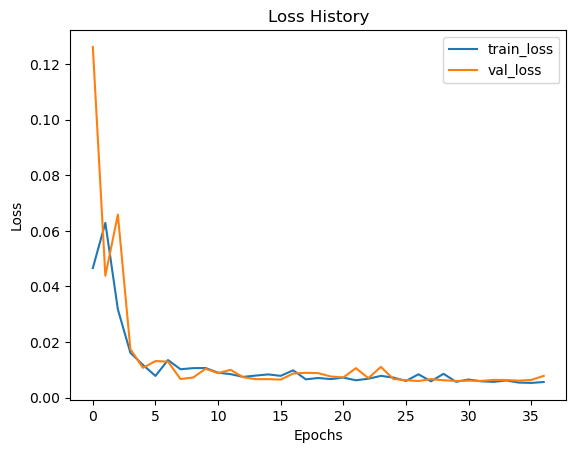

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

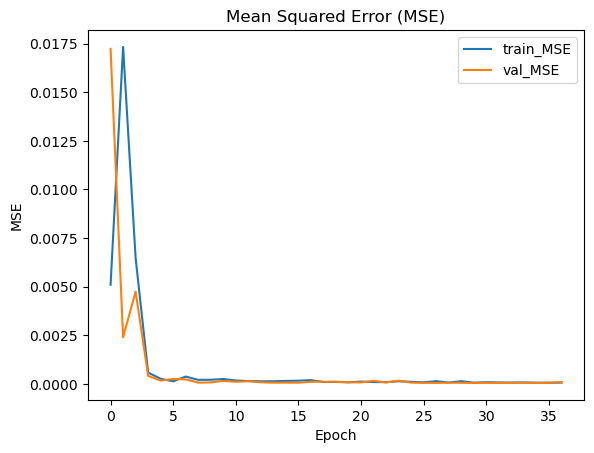

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

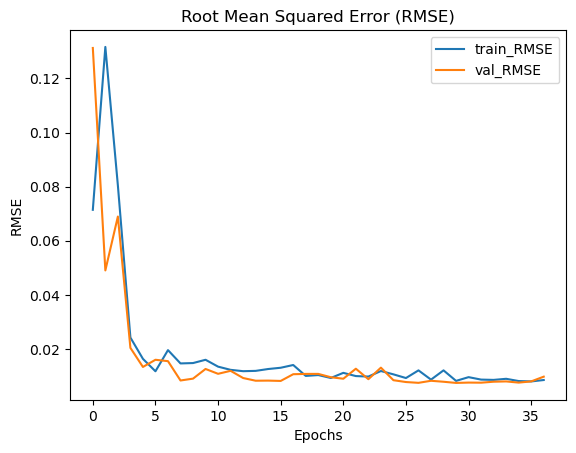

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

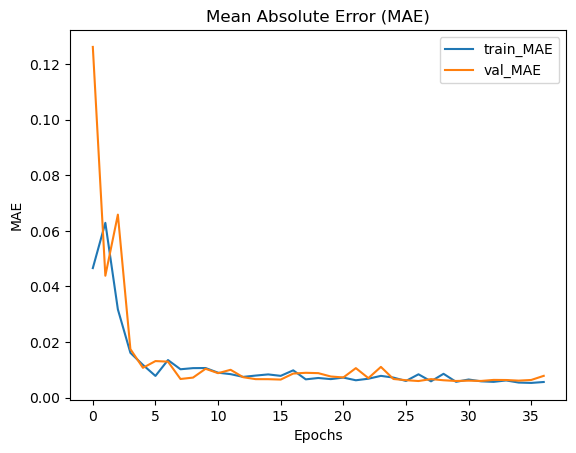

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

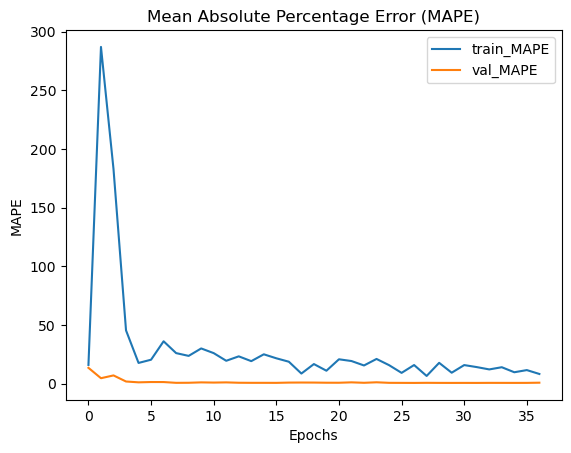

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:48:43.909480: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


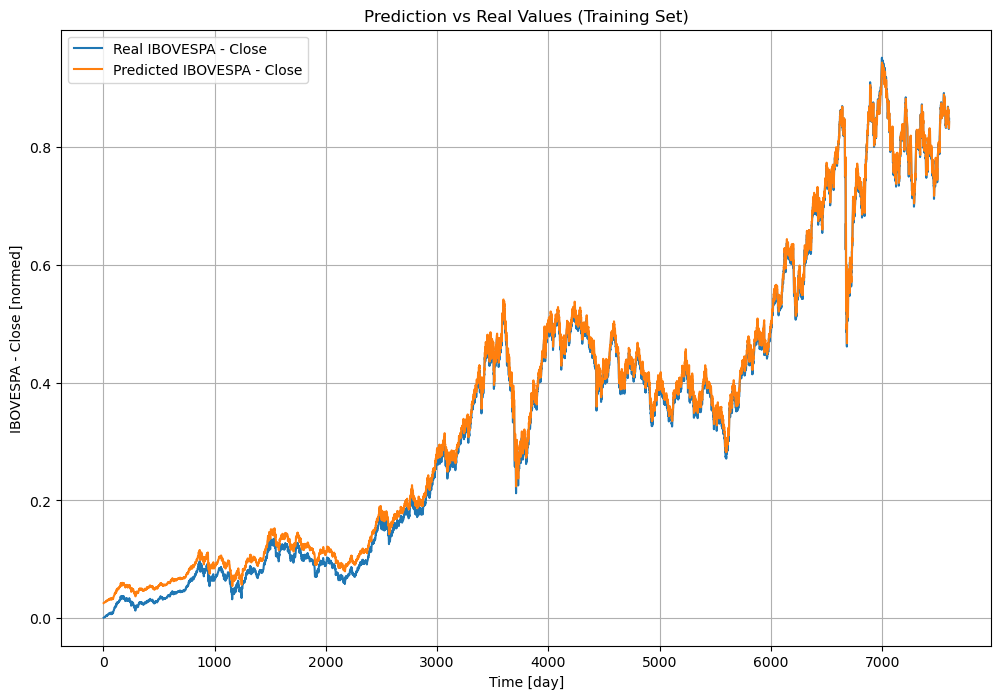

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


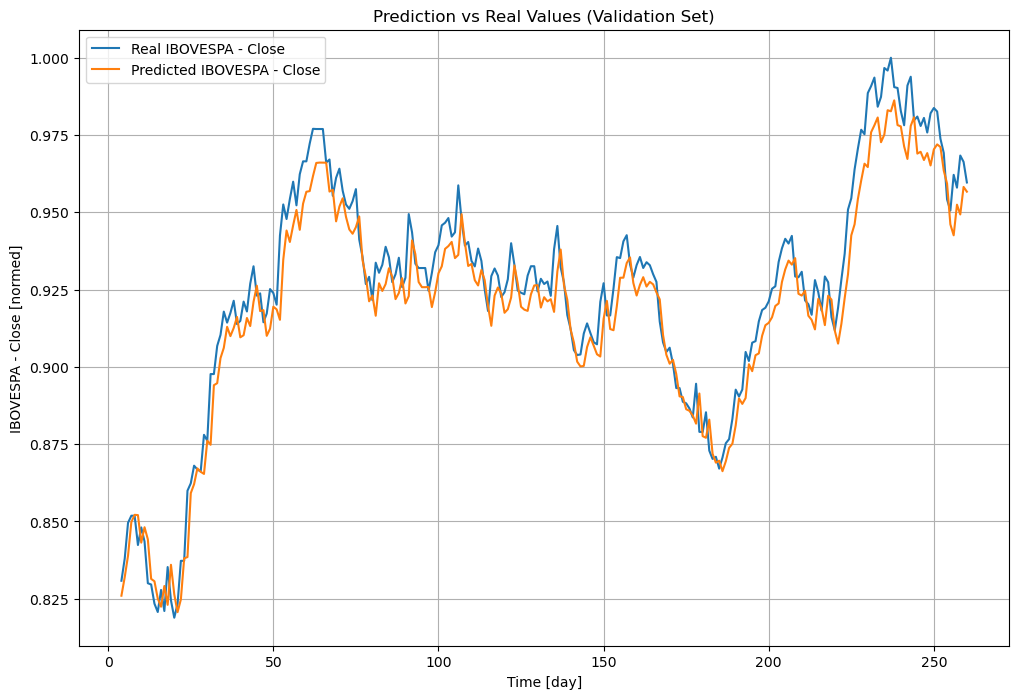

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


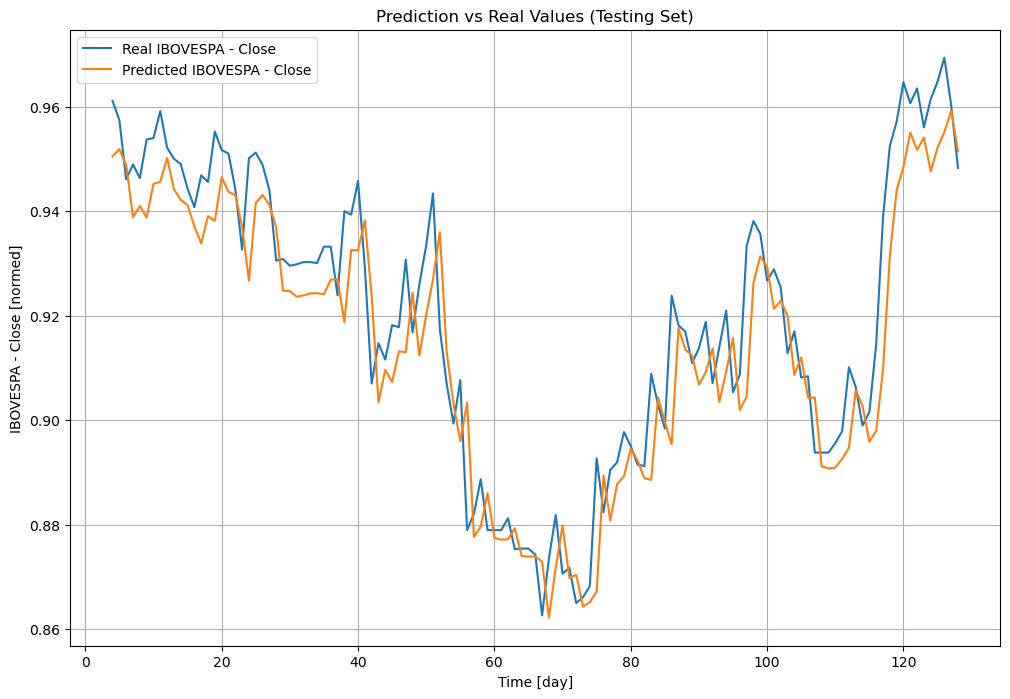

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

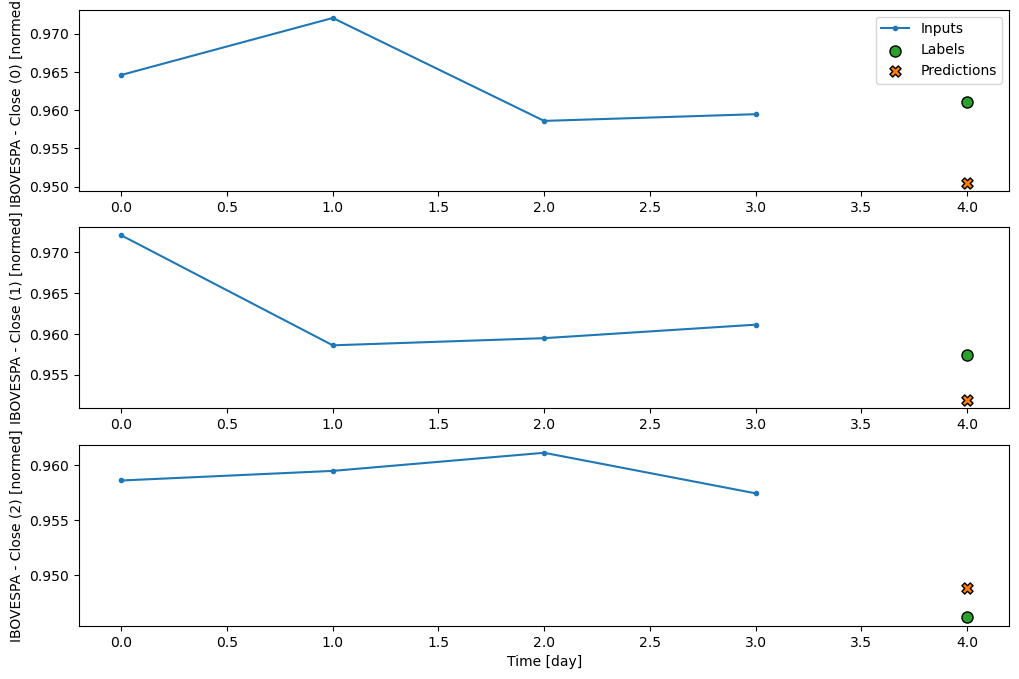

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:34s:376ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[[0.95051533, 0.95051533, 0.95051533, ..., 0.95051533,
         0.95051533, 0.95051533]],

       [[0.95188695, 0.95188695, 0.95188695, ..., 0.95188695,
         0.95188695, 0.95188695]],

       [[0.94882244, 0.94882244, 0.94882244, ..., 0.94882244,
         0.94882244, 0.94882244]],

       ...,

       [[0.9551461 , 0.9551461 , 0.9551461 , ..., 0.9551461 ,
         0.9551461 , 0.9551461 ]],

       [[0.9592574 , 0.9592574 , 0.9592574 , ..., 0.9592574 ,
         0.9592574 , 0.9592574 ]],

       [[0.9515116 , 0.9515116 , 0.9515116 , ..., 0.9515116 ,
         0.9515116 , 0.9515116 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')